In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import matplotlib.ticker as plticker
import squarify
warnings.filterwarnings('ignore')

### Análise Setor Real

In [2]:
sc_setor_real = pd.read_csv('sc_setor_real.csv', sep = ';', encoding = 'iso-8859-1')
pr_setor_real = pd.read_csv('pr_setor_real.csv', sep = ';', encoding = 'iso-8859-1')
rs_setor_real = pd.read_csv('rs_setor_real.csv', sep = ';', encoding = 'iso-8859-1')
rj_setor_real = pd.read_csv('rj_setor_real.csv', sep = ';', encoding = 'iso-8859-1')
sp_setor_real = pd.read_csv('sp_setor_real.csv', sep = ';', encoding = 'iso-8859-1')

In [3]:
def limpeza(x):
    x.columns = ['data', 'volume_vendas', 'empregos_criados', 'producao_industrial', 'atividade_economica', 'producao_servicos']
    x = x.iloc[:-1, :]
    x['data'] = x['data'].str.replace('/', '-')
    return x

In [4]:
sc_setor_real = limpeza(sc_setor_real)
pr_setor_real = limpeza(pr_setor_real)
rs_setor_real = limpeza(rs_setor_real)
rj_setor_real = limpeza(rj_setor_real)

In [5]:
sp_setor_real.columns = ['data', 'volume_vendas', 'empregos_criados', 'atividade_economica', 'producao_servicos']
sp_setor_real = sp_setor_real.iloc[:-1, :]
sp_setor_real['data'] = sp_setor_real['data'].str.replace('/', '-')

In [6]:
sp_setor_real['producao_industrial'] = 0

In [7]:
sc_setor_real['estado'] = 'SC'
pr_setor_real['estado'] = 'PR'
rs_setor_real['estado'] = 'RS'
rj_setor_real['estado'] = 'RJ'
sp_setor_real['estado'] = 'SP'

In [8]:
df_setor_real = pd.concat([sc_setor_real, pr_setor_real, rs_setor_real, rj_setor_real, sp_setor_real])

In [9]:
len(df_setor_real)

440

In [10]:
df_setor_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 87
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   data                 440 non-null    object
 1   volume_vendas        440 non-null    object
 2   empregos_criados     440 non-null    object
 3   producao_industrial  440 non-null    object
 4   atividade_economica  440 non-null    object
 5   producao_servicos    440 non-null    object
 6   estado               440 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [11]:
df_setor_real['data'] = pd.to_datetime(df_setor_real['data']).dt.strftime('%Y-%B')

In [12]:
df_setor_real[['ano', 'mes']] = df_setor_real['data'].str.split('-', 1, expand = True)

In [13]:
df_setor_real['data'] = pd.to_datetime(df_setor_real['data']).dt.strftime('%Y-%m')

In [14]:
df_setor_real['empregos_criados'] = df_setor_real['empregos_criados'].str.replace(',', '')

In [15]:
colunas = ['volume_vendas', 'empregos_criados', 'producao_industrial', 'atividade_economica', 'producao_servicos']
df_setor_real[colunas] = df_setor_real[colunas].astype(float)

In [16]:
df_setor_real['producao_industrial'] = df_setor_real['producao_industrial'].replace(0, np.nan)

In [17]:
df_setor_real = df_setor_real.reset_index()
df_setor_real = df_setor_real.drop(columns = 'index')

In [18]:
df_setor_real = df_setor_real.sort_values(by = 'data', ascending = True)

In [19]:
df_setor_real

,data,volume_vendas,empregos_criados,producao_industrial,atividade_economica,producao_servicos,estado,ano,mes
0,2015-01,109.47,14637.0,94.8,142.88,98.56,SC,2015,January
352,2015-01,99.87,-13599.0,NaN,148.07,99.36,SP,2015,January
88,2015-01,106.60,6713.0,93.8,152.27,96.55,PR,2015,January
264,2015-01,98.51,-40658.0,97.3,132.58,97.27,RJ,2015,January
176,2015-01,94.60,8338.0,93.0,136.25,99.38,RS,2015,January
...,...,...,...,...,...,...,...,...,...
351,2022-04,84.07,22403.0,106.7,128.89,81.95,RJ,2022,April
175,2022-04,95.35,8925.0,98.1,153.78,92.78,PR,2022,April
87,2022-04,126.91,7238.0,101.3,156.77,96.00,SC,2022,April
263,2022-04,111.92,8939.0,99.7,128.25,90.40,RS,2022,April


In [20]:
empregos_criados_ano = df_setor_real.groupby(['estado', 'ano']).agg({'empregos_criados' : 'sum'});

In [21]:
# preciso arrumar, so a primeira observacao ta como NaN
empregos_criados_ano.sort_values(['estado', 'ano'], inplace = True)
empregos_criados_ano['diff_empregos_criados'] = empregos_criados_ano['empregos_criados'].diff() / empregos_criados_ano['empregos_criados'].abs().shift()
empregos_criados_ano['diff_empregos_criados'] = empregos_criados_ano['diff_empregos_criados'].round(2)
empregos_criados_ano = empregos_criados_ano.reset_index()

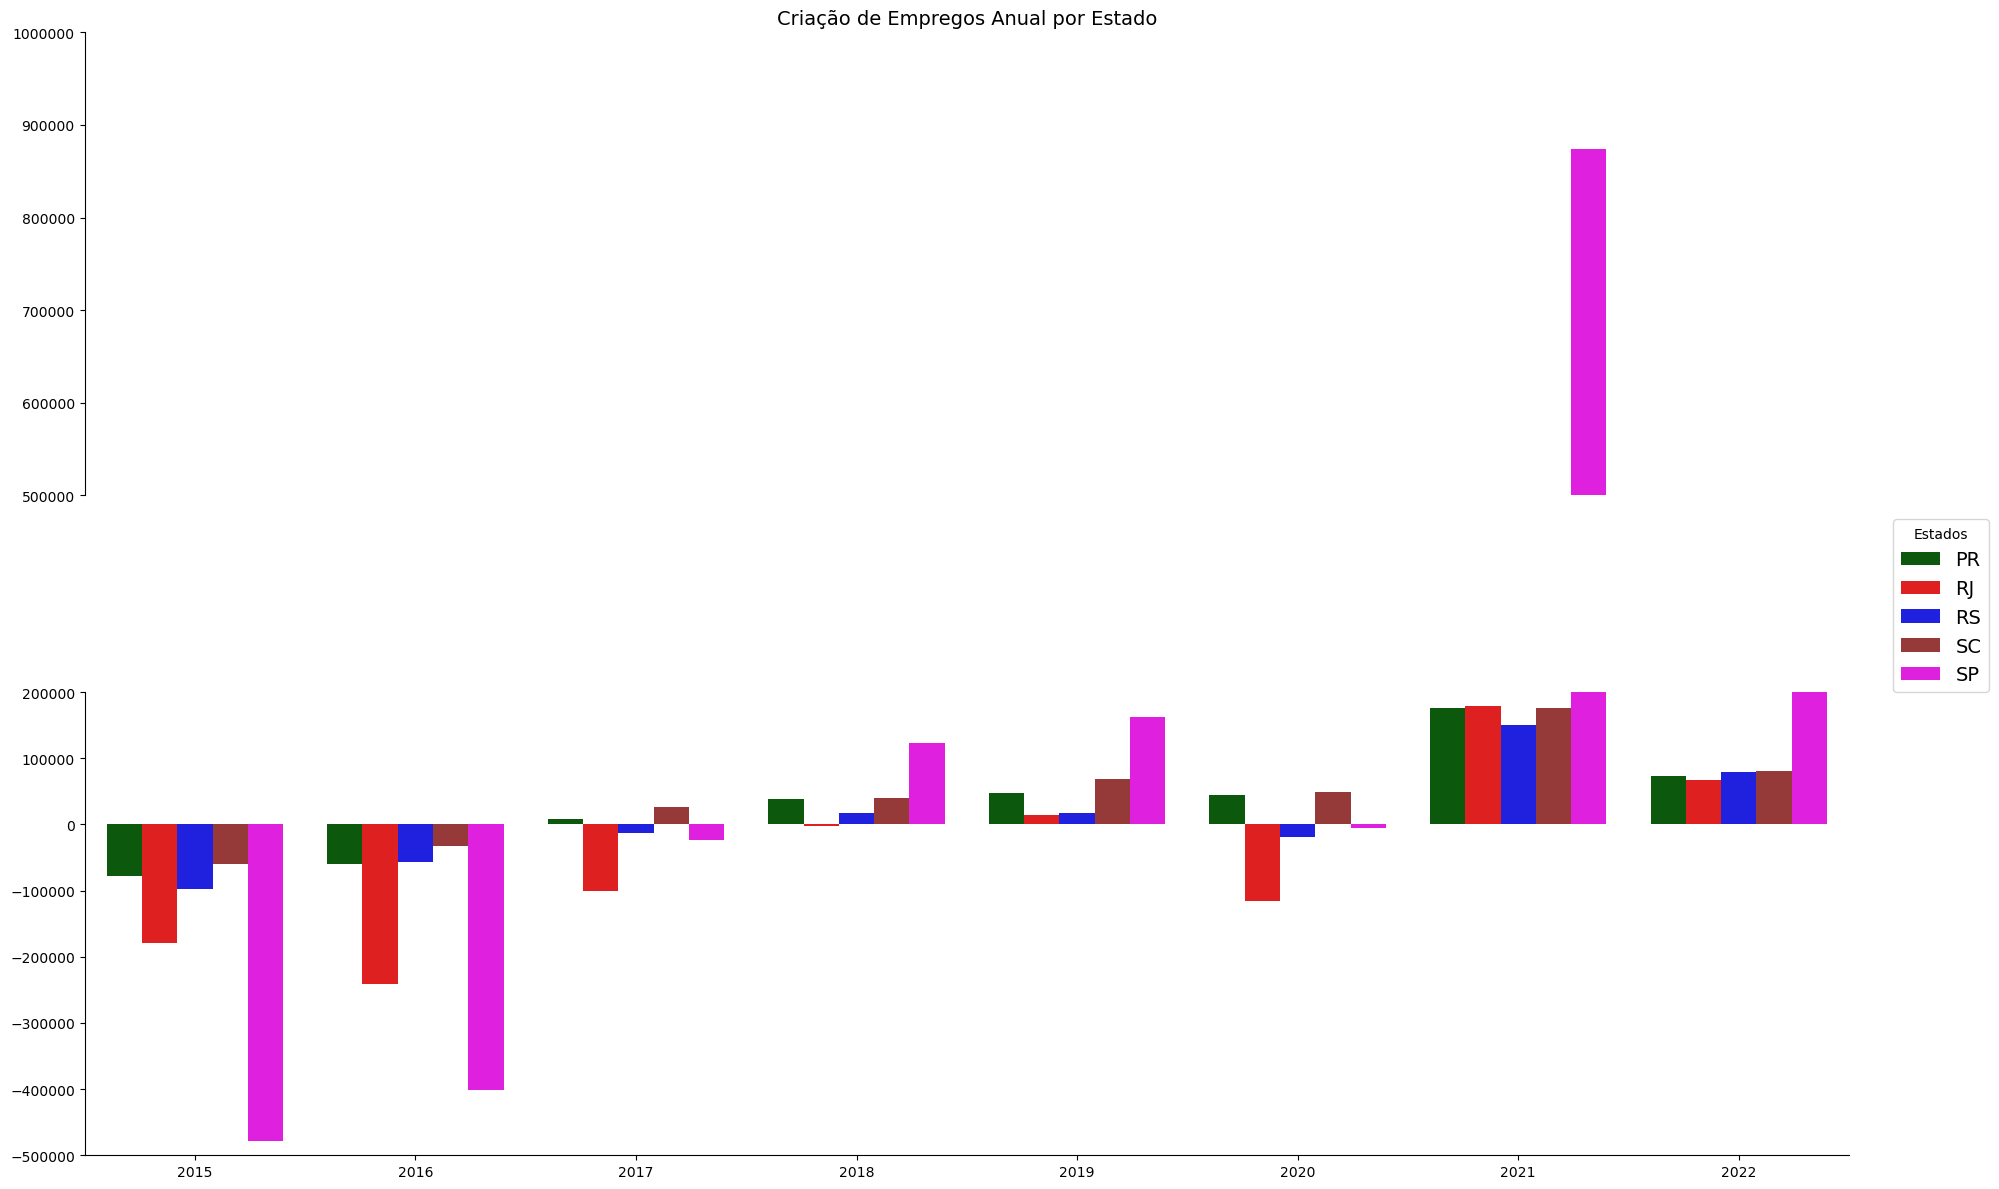

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, sharex = True, figsize = (20, 12))

cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}
ax1 = sns.barplot(data = empregos_criados_ano, x = 'ano', y = 'empregos_criados', hue = 'estado',
                  palette = cores, ax = ax1)
ax2 = sns.barplot(data = empregos_criados_ano, x = 'ano', y = 'empregos_criados', hue = 'estado', 
                  palette = cores, ax = ax2)

ax1.set_ylim(500000, 1000000)
ax2.set_ylim(-500000, 200000)
ax1.get_xaxis().set_visible(False)
ax1.ticklabel_format(style = 'plain', useOffset = False, axis = 'y')

ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.get_legend().remove()
ax2.get_legend().remove()
ax2.legend(loc = (1.025, 1), title = 'Estados', fontsize = 14)

ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()
ax1.set_title('Criação de Empregos Anual por Estado', fontsize = 14)
fig.subplots_adjust(left = 0.15, right = 0.85, bottom = 0.15, top = 0.85)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.xlabel('')

fig.tight_layout()
plt.savefig('plot_criacao_empregos_anual')
plt.show();

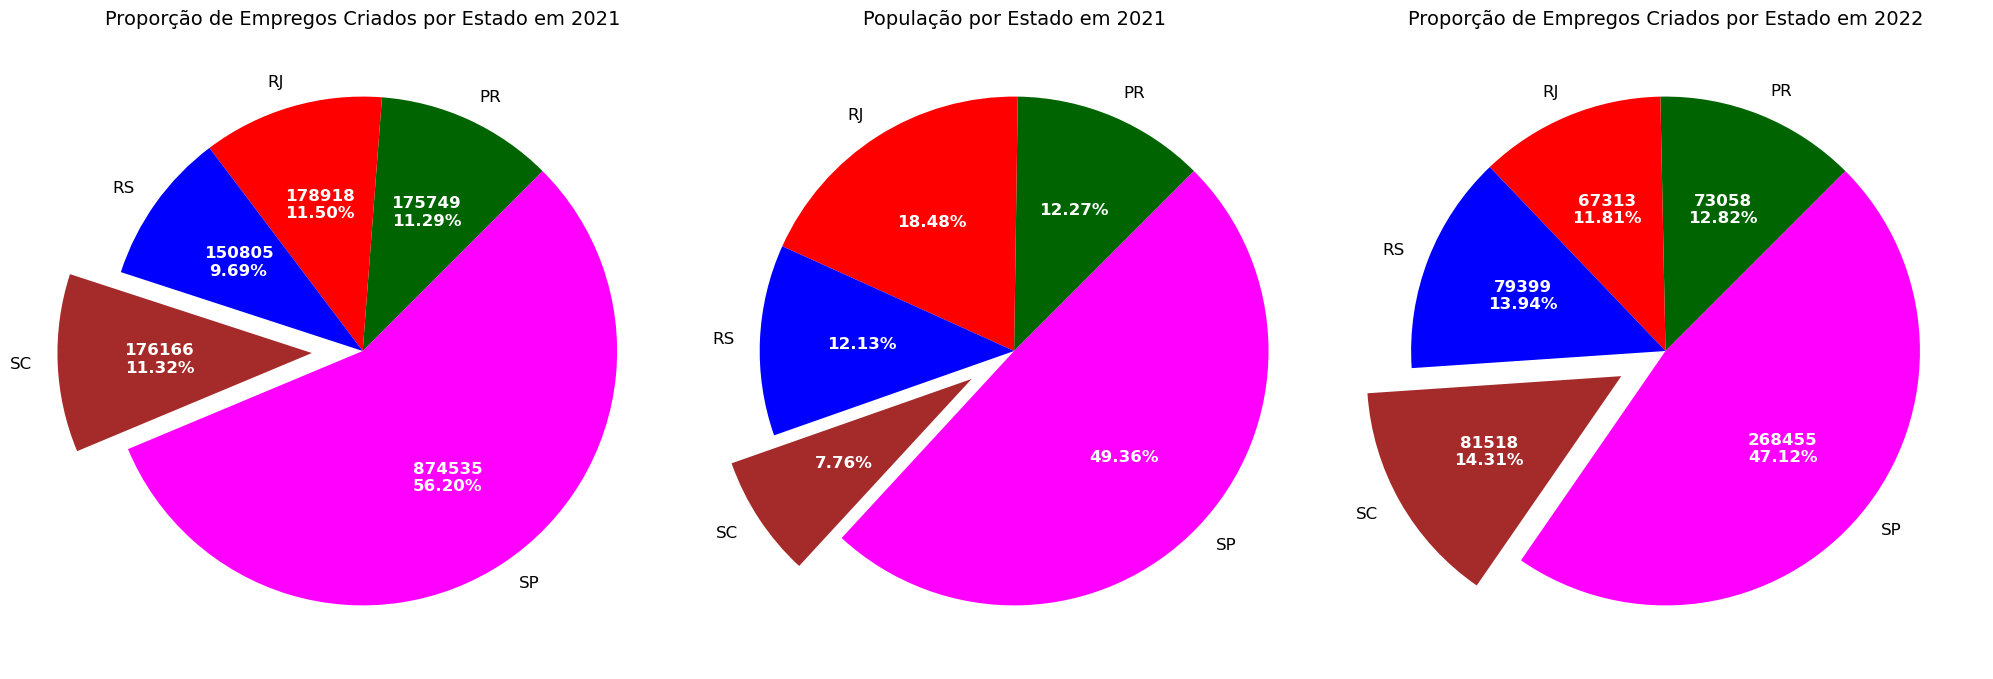

In [23]:
fig, axes = plt.subplots(1, 3, figsize = (20, 12))

## pieplot empregos criados em 2022
cores = ['darkgreen', 'red', 'blue', 'brown', 'magenta']
estados = ['PR', 'RJ', 'RS', 'SC', 'SP']
explode = [0, 0, 0, 0.2, 0]

# funcao para deixar valores em cor branca
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}\n{p:.2f}%'.format(p = pct, v = val)
    return my_autopct

# empregos criados em 2021
empregos_2021 = empregos_criados_ano[empregos_criados_ano['ano'] == '2021']
empregos_2021_tent = empregos_2021.iloc[:, 2]

_, _, autotexts = axes[0].pie(data = empregos_criados_ano[empregos_criados_ano['ano'] == '2021'], x = 'empregos_criados', 
            labels = estados, colors = cores, autopct = make_autopct(empregos_2021_tent), startangle = 45, explode = explode,
            textprops = {'color' : "black", 'fontsize' : 12})


# pieplot populacao em 2021 (serve como parametro para 2021)
rotulos = ['PR', 'RJ', 'RS', 'SC', 'SP']
tamanho = [11597484, 17463349, 11466630, 7338473, 46649132]

_, _, autotextss = axes[1].pie(tamanho, labels = rotulos, autopct = '%.2f%%', colors = cores, startangle = 45,
                               explode = explode, textprops = {'color' : "black", 'fontsize' : 12})


# empregos criados em 2022
empregos_2022 = empregos_criados_ano[empregos_criados_ano['ano'] == '2022']
empregos_2022_tent = empregos_2022.iloc[:, 2]

_, _, autotextsss = axes[2].pie(data = empregos_criados_ano[empregos_criados_ano['ano'] == '2022'], x = 'empregos_criados', 
            labels = estados, colors = cores, autopct = make_autopct(empregos_2022_tent), startangle = 45, explode = explode,
            textprops = {'color' : "black", 'fontsize' : 12})

axes[0].set_title('Proporção de Empregos Criados por Estado em 2021', fontsize = 14)
axes[1].set_title('População por Estado em 2021', fontsize = 14)
axes[2].set_title('Proporção de Empregos Criados por Estado em 2022', fontsize = 14)

# preciso mudar o nome do autotexts para diferentes nomes quando to chamando a funcao pie
# para funcionar
plt.setp(autotexts, **{'color':'white', 'weight':'bold', 'fontsize':12})
plt.setp(autotextss, **{'color':'white', 'weight':'bold', 'fontsize':12})
plt.setp(autotextsss, **{'color':'white', 'weight':'bold', 'fontsize':12})
[autotext.set_color('white') for autotext in autotexts]
[autotext.set_color('white') for autotext in autotextss]
[autotext.set_color('white') for autotext in autotextsss]

fig.tight_layout()
plt.savefig('plot_criacao_empregos_anos_recentes')
plt.show()

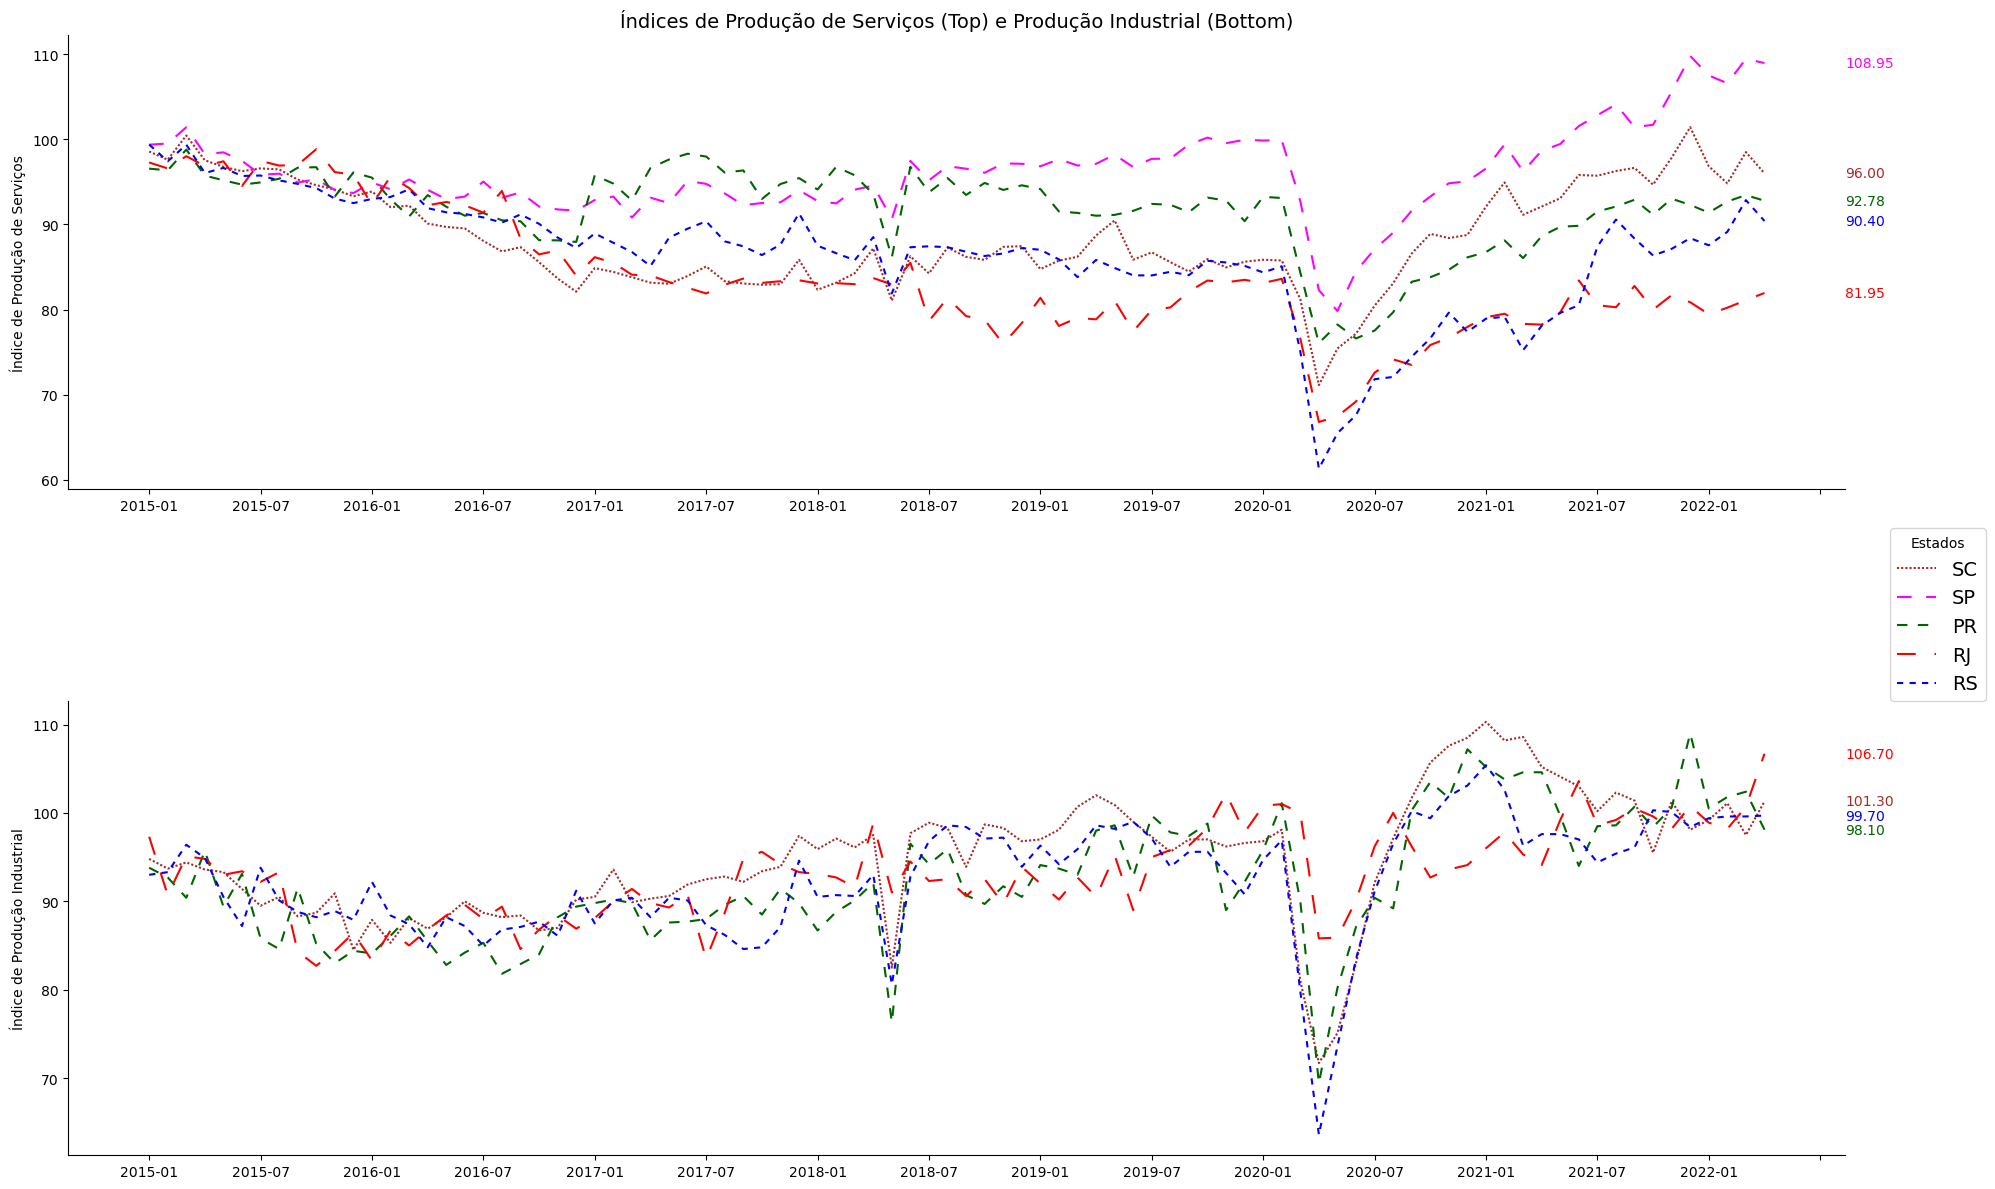

In [24]:
import matplotlib.ticker as plticker
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (20, 12))
cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}
dashes = {'SC' : (1, 1), 'RS' : (3, 3), 'PR' : (5, 5), 'SP' : (7, 7), 'RJ' : (9, 9)}


sns.lineplot(data = df_setor_real, x = 'data', y = 'producao_servicos', hue = 'estado', style = 'estado', 
             palette = cores, dashes = dashes, ax = ax1)
sns.lineplot(data = df_setor_real, x = 'data', y = 'producao_industrial', hue = 'estado', style = 'estado',
             palette = cores, dashes = dashes, ax = ax2)

ax1.get_legend().remove()
ax2.get_legend().remove()
ax2.legend(loc = (1.025, 1), title = 'Estados', fontsize = 14)

loc = plticker.MultipleLocator(base = 6.0) 
ax1.xaxis.set_major_locator(loc)
ax2.xaxis.set_major_locator(loc)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_ylabel('Índice de Produção de Serviços')
ax2.set_ylabel('Índice de Produção Industrial')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_title('Índices de Produção de Serviços (Top) e Produção Industrial (Bottom)', fontsize = 14)

for i in ax1.lines:
    y = i.get_ydata()
    if len(y) > 0:
        ax1.annotate(f'{y[-1]:.2f}', xy = (1,y[-1]), xycoords = ('axes fraction', 'data'), 
                     ha = 'left', va = 'center', color = i.get_color())

for i in ax2.lines:
    y = i.get_ydata()
    if len(y) > 0:
        ax2.annotate(f'{y[-1]:.2f}', xy = (1,y[-1]), xycoords = ('axes fraction', 'data'), 
                     ha = 'left', va = 'center', color = i.get_color())        

        
fig.tight_layout()
plt.savefig('indice_servicos_industria')
plt.show();

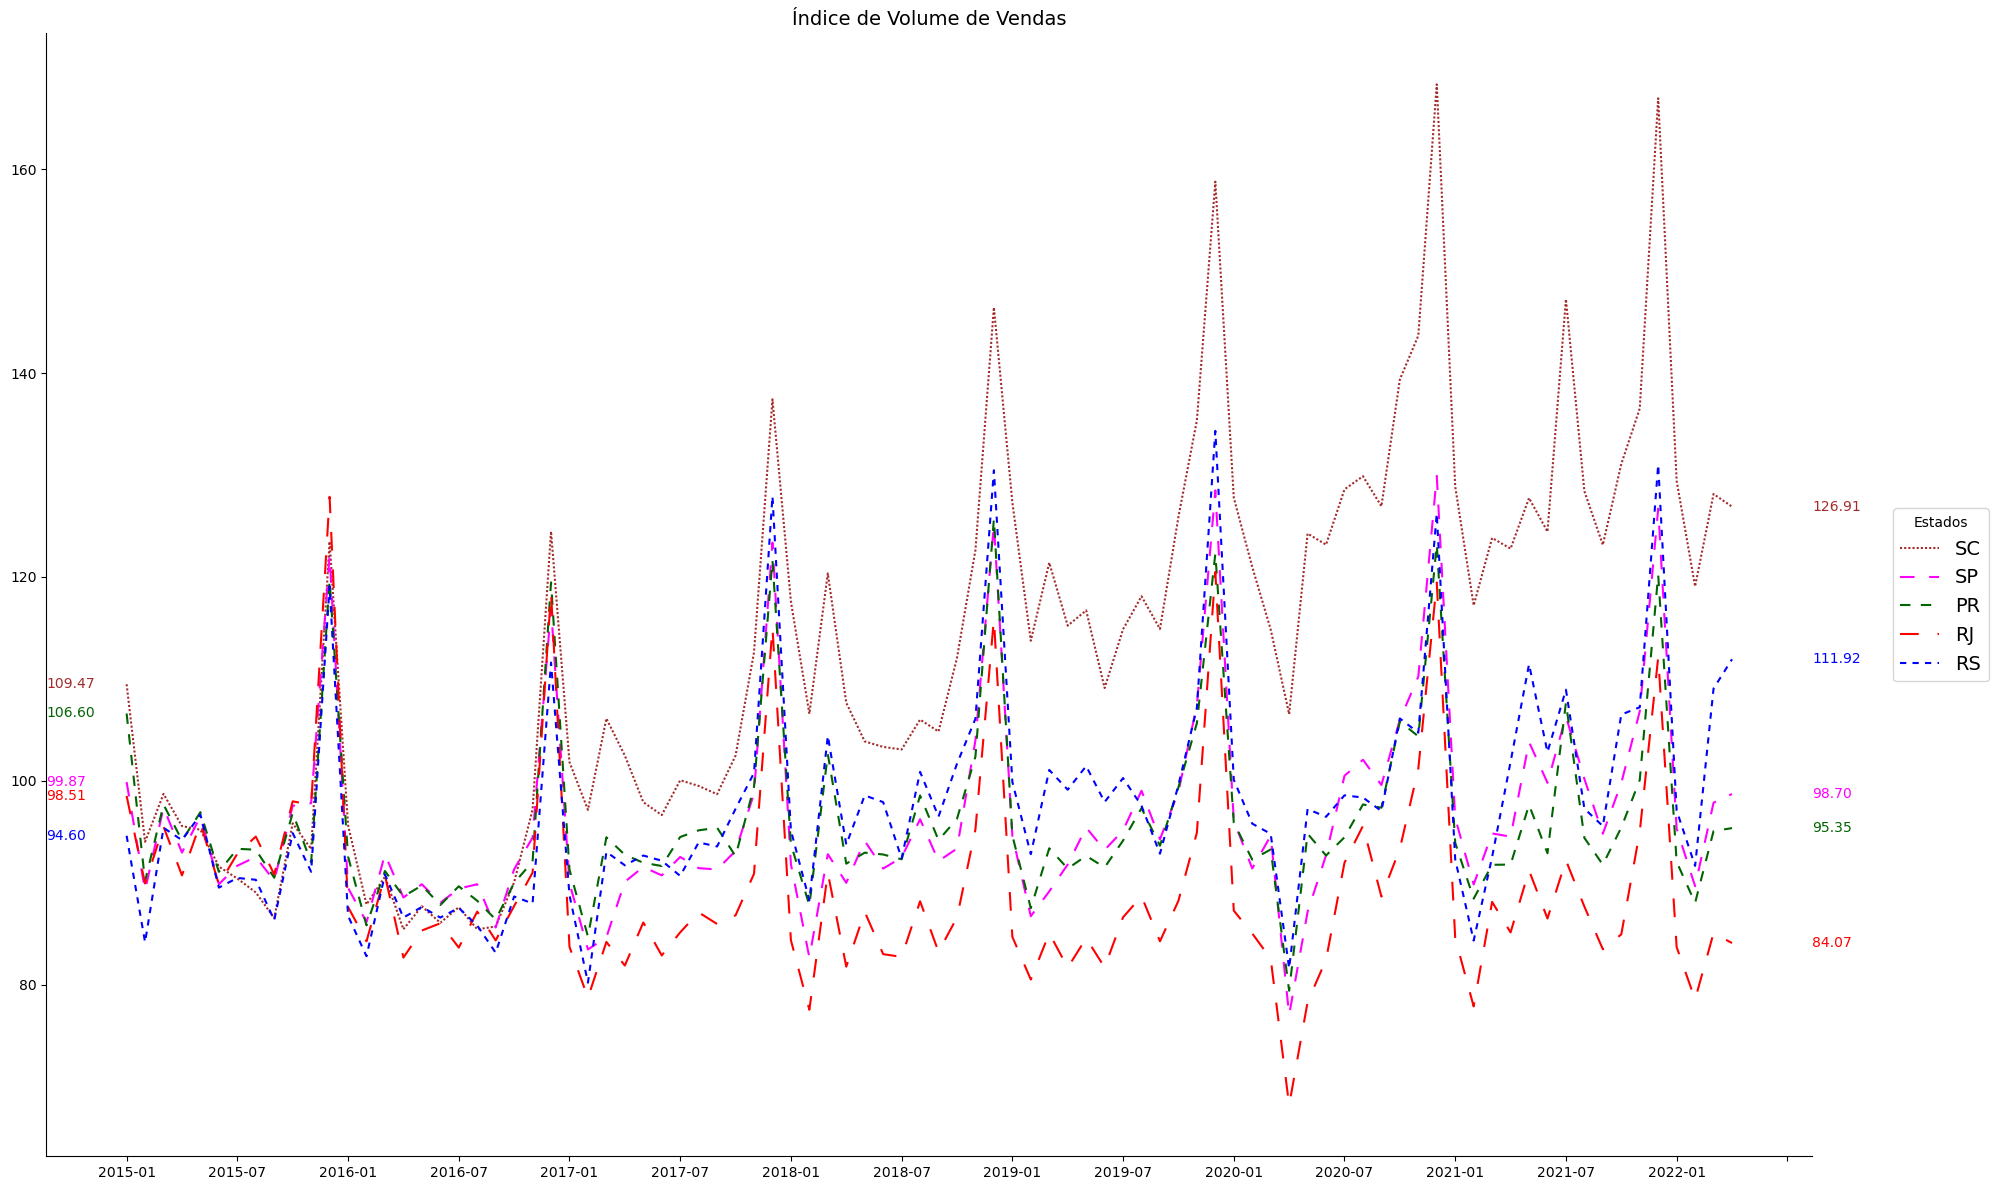

In [25]:
import matplotlib.ticker as plticker
fig, ax = plt.subplots(figsize = (20, 12))
cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}
dashes = {'SC' : (1, 1), 'RS' : (3, 3), 'PR' : (5, 5), 'SP' : (7, 7), 'RJ' : (9, 9)}
sns.lineplot(data = df_setor_real, x = 'data', y = 'volume_vendas', hue = 'estado', style = 'estado',
            palette = cores, dashes = dashes)

ax.legend(loc = 'center left', title = 'Estados', fontsize = 14, bbox_to_anchor = (1.04, 0.5))

loc = plticker.MultipleLocator(base = 6.0) 
ax.xaxis.set_major_locator(loc)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Índice de Volume de Vendas', fontsize = 14)

for i in ax.lines:
    y = i.get_ydata()
    if len(y) > 0:
        ax.annotate(f'{y[0]:.2f}', xy = (0,y[0]), xycoords = ('axes fraction', 'data'), 
                     ha = 'left', va = 'center', color = i.get_color())
        ax.annotate(f'{y[-1]:.2f}', xy = (1,y[-1]), xycoords = ('axes fraction', 'data'), 
                     ha = 'left', va = 'center', color = i.get_color())

fig.tight_layout()
plt.savefig('indice_vendas')        
plt.show();

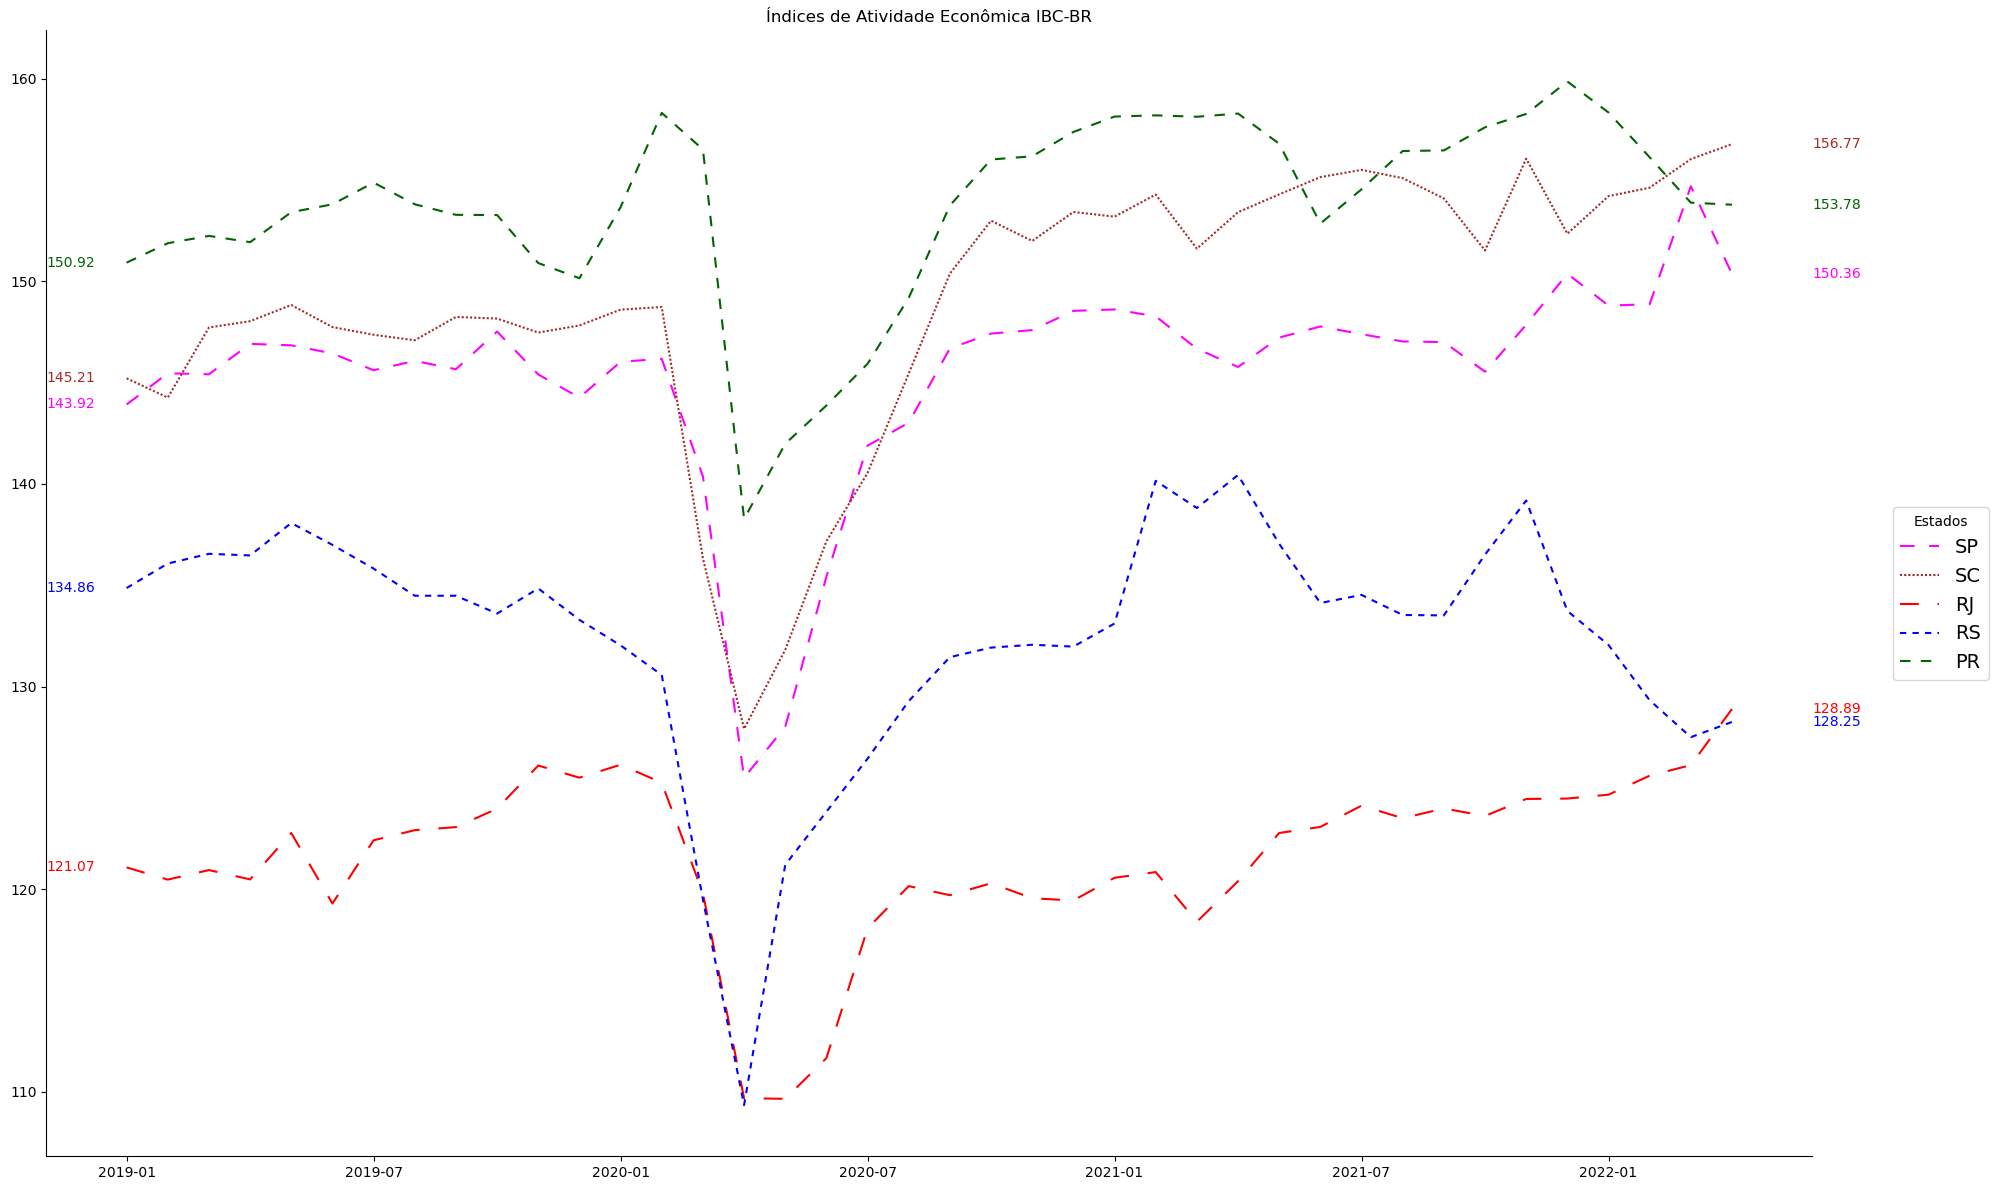

In [26]:
df_setor_real_recente = df_setor_real[df_setor_real['data'] >= '2019-01']
import matplotlib.ticker as plticker
fig, ax = plt.subplots(figsize = (20, 12))
cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}
dashes = {'SC' : (1, 1), 'RS' : (3, 3), 'PR' : (5, 5), 'SP' : (7, 7), 'RJ' : (9, 9)}

sns.lineplot(data = df_setor_real_recente, x = 'data', y = 'atividade_economica', hue = 'estado', style = 'estado',
            palette = cores, dashes = dashes)

ax.legend(loc = 'center left', title = 'Estados', fontsize = 14, bbox_to_anchor = (1.04, 0.5))

loc = plticker.MultipleLocator(base = 6.0) 
ax.xaxis.set_major_locator(loc)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Índices de Atividade Econômica IBC-BR')

for i in ax.lines:
    y = i.get_ydata()
    if len(y) > 0:
        ax.annotate(f'{y[0]:.2f}', xy = (0,y[0]), xycoords = ('axes fraction', 'data'), 
                     ha = 'left', va = 'center', color = i.get_color())
        ax.annotate(f'{y[-1]:.2f}', xy = (1,y[-1]), xycoords = ('axes fraction', 'data'), 
                     ha = 'left', va = 'center', color = i.get_color())

fig.tight_layout()
plt.savefig('indice_ibcbr')
plt.show();

### Finanças Públicas

In [27]:
sc_finan_pub = pd.read_csv('sc_finan_pub.csv', sep = ';', encoding = 'iso-8859-1')
pr_finan_pub = pd.read_csv('pr_finan_pub.csv', sep = ';', encoding = 'iso-8859-1')
rs_finan_pub = pd.read_csv('rs_finan_pub.csv', sep = ';', encoding = 'iso-8859-1')
rj_finan_pub = pd.read_csv('rj_finan_pub.csv', sep = ';', encoding = 'iso-8859-1')
sp_finan_pub = pd.read_csv('sp_finan_pub.csv', sep = ';', encoding = 'iso-8859-1')

In [28]:
def limpeza(x):
    x.columns = ['data', 'resultado_prim_estado_muni', 'divida_liquida_estado_muni', 'resultado_prim_estado',
                 'divida_liquida_estado']
    x = x.iloc[:-1, :]
    x['data'] = x['data'].str.replace('° Quar.', '-')
    return x

In [29]:
sc_finan_pub = limpeza(sc_finan_pub)
pr_finan_pub = limpeza(pr_finan_pub)
rs_finan_pub = limpeza(rs_finan_pub)
rj_finan_pub = limpeza(rj_finan_pub)
sp_finan_pub = limpeza(sp_finan_pub)

In [30]:
sc_finan_pub['estado'] = 'SC'
pr_finan_pub['estado'] = 'PR'
rs_finan_pub['estado'] = 'RS'
rj_finan_pub['estado'] = 'RJ'
sp_finan_pub['estado'] = 'SP'

In [31]:
df_finan_pub = pd.concat([sc_finan_pub, pr_finan_pub, rs_finan_pub, rj_finan_pub, sp_finan_pub])

In [32]:
df_finan_pub = df_finan_pub[df_finan_pub['data'].str.startswith('4', na = False)].reset_index()
df_finan_pub = df_finan_pub.drop(columns = 'index')

In [33]:
df_finan_pub['data'] = df_finan_pub['data'].str.replace('4-', '')

In [34]:
colunas = ['resultado_prim_estado_muni', 'divida_liquida_estado_muni', 'resultado_prim_estado', 'divida_liquida_estado']
df_finan_pub[colunas] = df_finan_pub[colunas].replace(',', '', regex = True)
df_finan_pub[colunas] = df_finan_pub[colunas].apply(pd.to_numeric, errors = 'coerce')

In [35]:
df_finan_pub = df_finan_pub.drop(columns = ['resultado_prim_estado_muni', 'divida_liquida_estado_muni'])

In [36]:
df_finan_pub['resultado_prim_estado'] = df_finan_pub['resultado_prim_estado'] * 1000000
df_finan_pub['divida_liquida_estado'] = df_finan_pub['divida_liquida_estado'] * 1000000

In [37]:
df_finan_pub_pib = df_finan_pub.sort_values(by = 'data').iloc[:-10, ]
df_finan_pub_pib = df_finan_pub_pib.reset_index()
df_finan_pub_pib = df_finan_pub_pib.drop(columns = 'index')

In [38]:
df_finan_pub_pib.head(4)

,data,resultado_prim_estado,divida_liquida_estado,estado
0,2015,-604450000.0,1.207013e+10,SC
1,2015,-711770000.0,6.840771e+10,RS
2,2015,868080000.0,1.155954e+11,RJ
3,2015,-899130000.0,1.947377e+10,PR


In [39]:
pib_estados = pd.read_csv('pib_preco_mercado_estados.csv', sep = ';', encoding = 'iso-8859-1')

In [40]:
pib_estados.columns = ['data', 'RS', 'RJ', 'SP', 'PR', 'SC']
pib_estados = pib_estados.iloc[:-1, ]

In [41]:
pib_estados

,data,RS,RJ,SP,PR,SC
0,2015,"381,992,601,117.90","659,138,951,835.16","1,939,901,907,127.46","376,962,821,635.88","249,079,642,278.97"
1,2016,"408,789,528,052.04","640,401,206,452.36","2,038,757,381,638.38","401,814,164,416.15","256,754,668,529.56"
2,2017,"423,270,047,301.93","671,605,668,053.87","2,120,761,635,111.55","421,497,870,222.34","277,270,236,582.96"
3,2018,"457,293,957,587.09","758,859,046,864.81","2,210,561,949,477.70","440,029,402,861.90","298,227,090,043.40"
4,2019,"482,464,177,470.65","779,927,917,085.75","2,348,338,000,290.16","466,377,036,432.74","323,263,857,404.77"


In [42]:
pib_estados = pib_estados.melt(id_vars = 'data')

In [43]:
pib_estados['value'] = pib_estados['value'].str.replace(',', '')
pib_estados['value'] = pib_estados['value'].apply(pd.to_numeric, errors = 'coerce')
pib_estados.columns = ['data', 'estado', 'pib']

In [44]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pib_estados = pib_estados.sort_values(by = 'data').reset_index()
pib_estados = pib_estados.drop(columns = 'index')

In [45]:
pib_estados.head(5)

,data,estado,pib
0,2015,RS,381992601117.90
1,2015,SC,249079642278.97
2,2015,RJ,659138951835.16
3,2015,PR,376962821635.88
4,2015,SP,1939901907127.46


In [46]:
# unindo as colunas de financas publicas e pib
df_finan_pub_pib = df_finan_pub_pib.merge(pib_estados, on = ['data', 'estado'], how = 'inner')

In [47]:
df_finan_pub_pib['resultado_prim_pib_perc'] = (df_finan_pub_pib['resultado_prim_estado'] / df_finan_pub_pib['pib']) * 100
df_finan_pub_pib['divida_liquida_perc'] = (df_finan_pub_pib['divida_liquida_estado'] / df_finan_pub_pib['pib']) * 100

In [48]:
df_finan_pub_pib.head(4)

,data,resultado_prim_estado,divida_liquida_estado,estado,pib,resultado_prim_pib_perc,divida_liquida_perc
0,2015,-604450000.00,12070130000.00,SC,249079642278.97,-0.24,4.85
1,2015,-711770000.00,68407710000.00,RS,381992601117.90,-0.19,17.91
2,2015,868080000.00,115595410000.00,RJ,659138951835.16,0.13,17.54
3,2015,-899130000.00,19473770000.00,PR,376962821635.88,-0.24,5.17


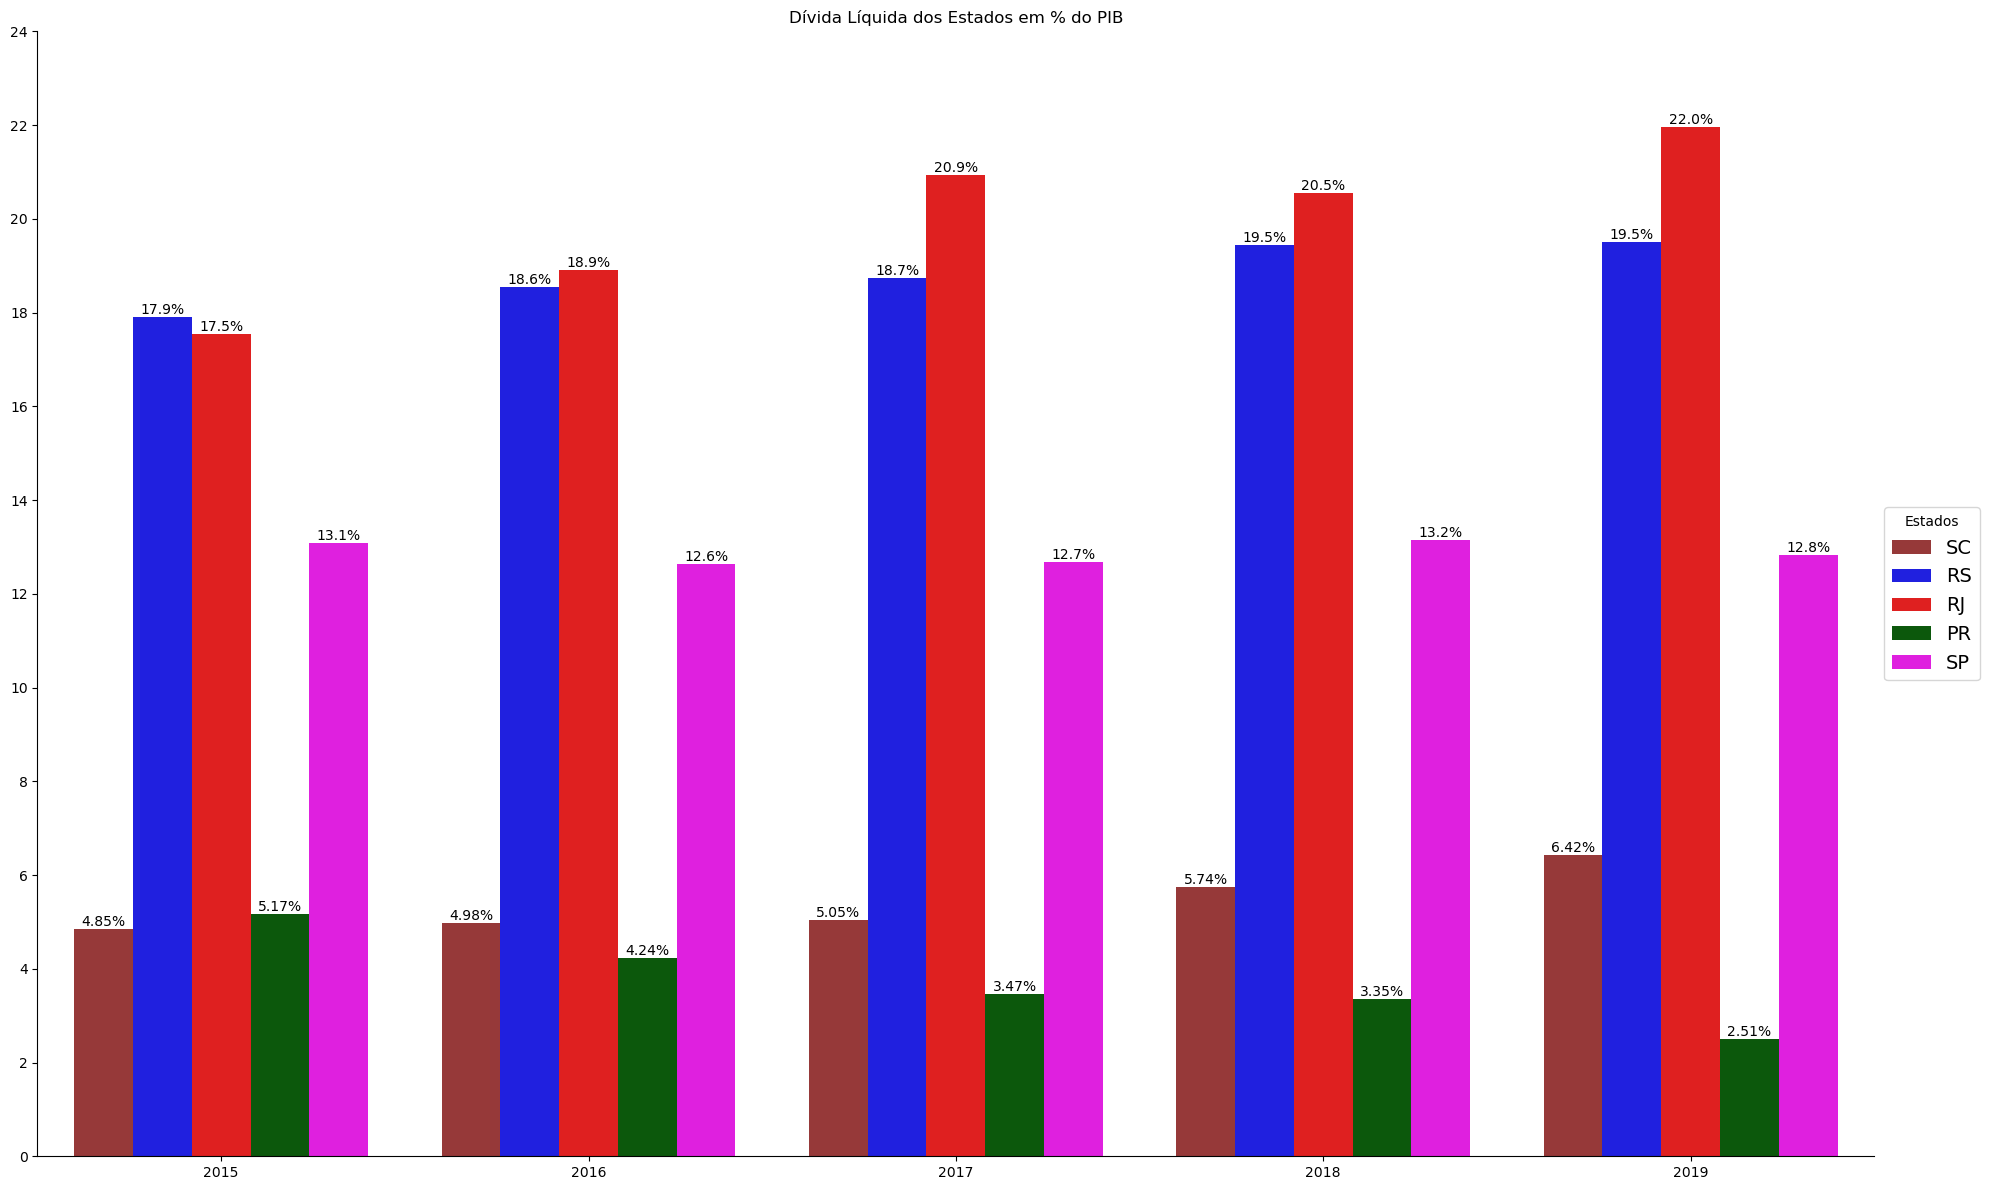

In [49]:
fig, ax = plt.subplots(figsize = (20, 12))
cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}

sns.barplot(data = df_finan_pub_pib, x = 'data', y = 'divida_liquida_perc', hue = 'estado', palette = cores)

ax.legend(loc = 'center left', title = 'Estados', fontsize = 14, bbox_to_anchor = (1, 0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Dívida Líquida dos Estados em % do PIB')
ax.set_yticks(range(0, 26, 2))

for container in ax.containers:
    labels = [f'{x:.3}%' for x in container.datavalues]
    ax.bar_label(container, labels = labels)


fig.tight_layout()
plt.savefig('divida_liquida_pib')
plt.show();

In [50]:
# evolucao pós 2019 ate 2021
df_finan_pub_evolucao = df_finan_pub[df_finan_pub['data'] > '2018']

In [51]:
df_finan_pub_evolucao['diferenca'] = (df_finan_pub_evolucao.groupby(['estado'])['divida_liquida_estado'].diff())
df_finan_pub_evolucao['diferenca_perc'] = ((df_finan_pub_evolucao.groupby(['estado'])['diferenca'].shift(-1) / df_finan_pub_evolucao['divida_liquida_estado']) * 100).shift()

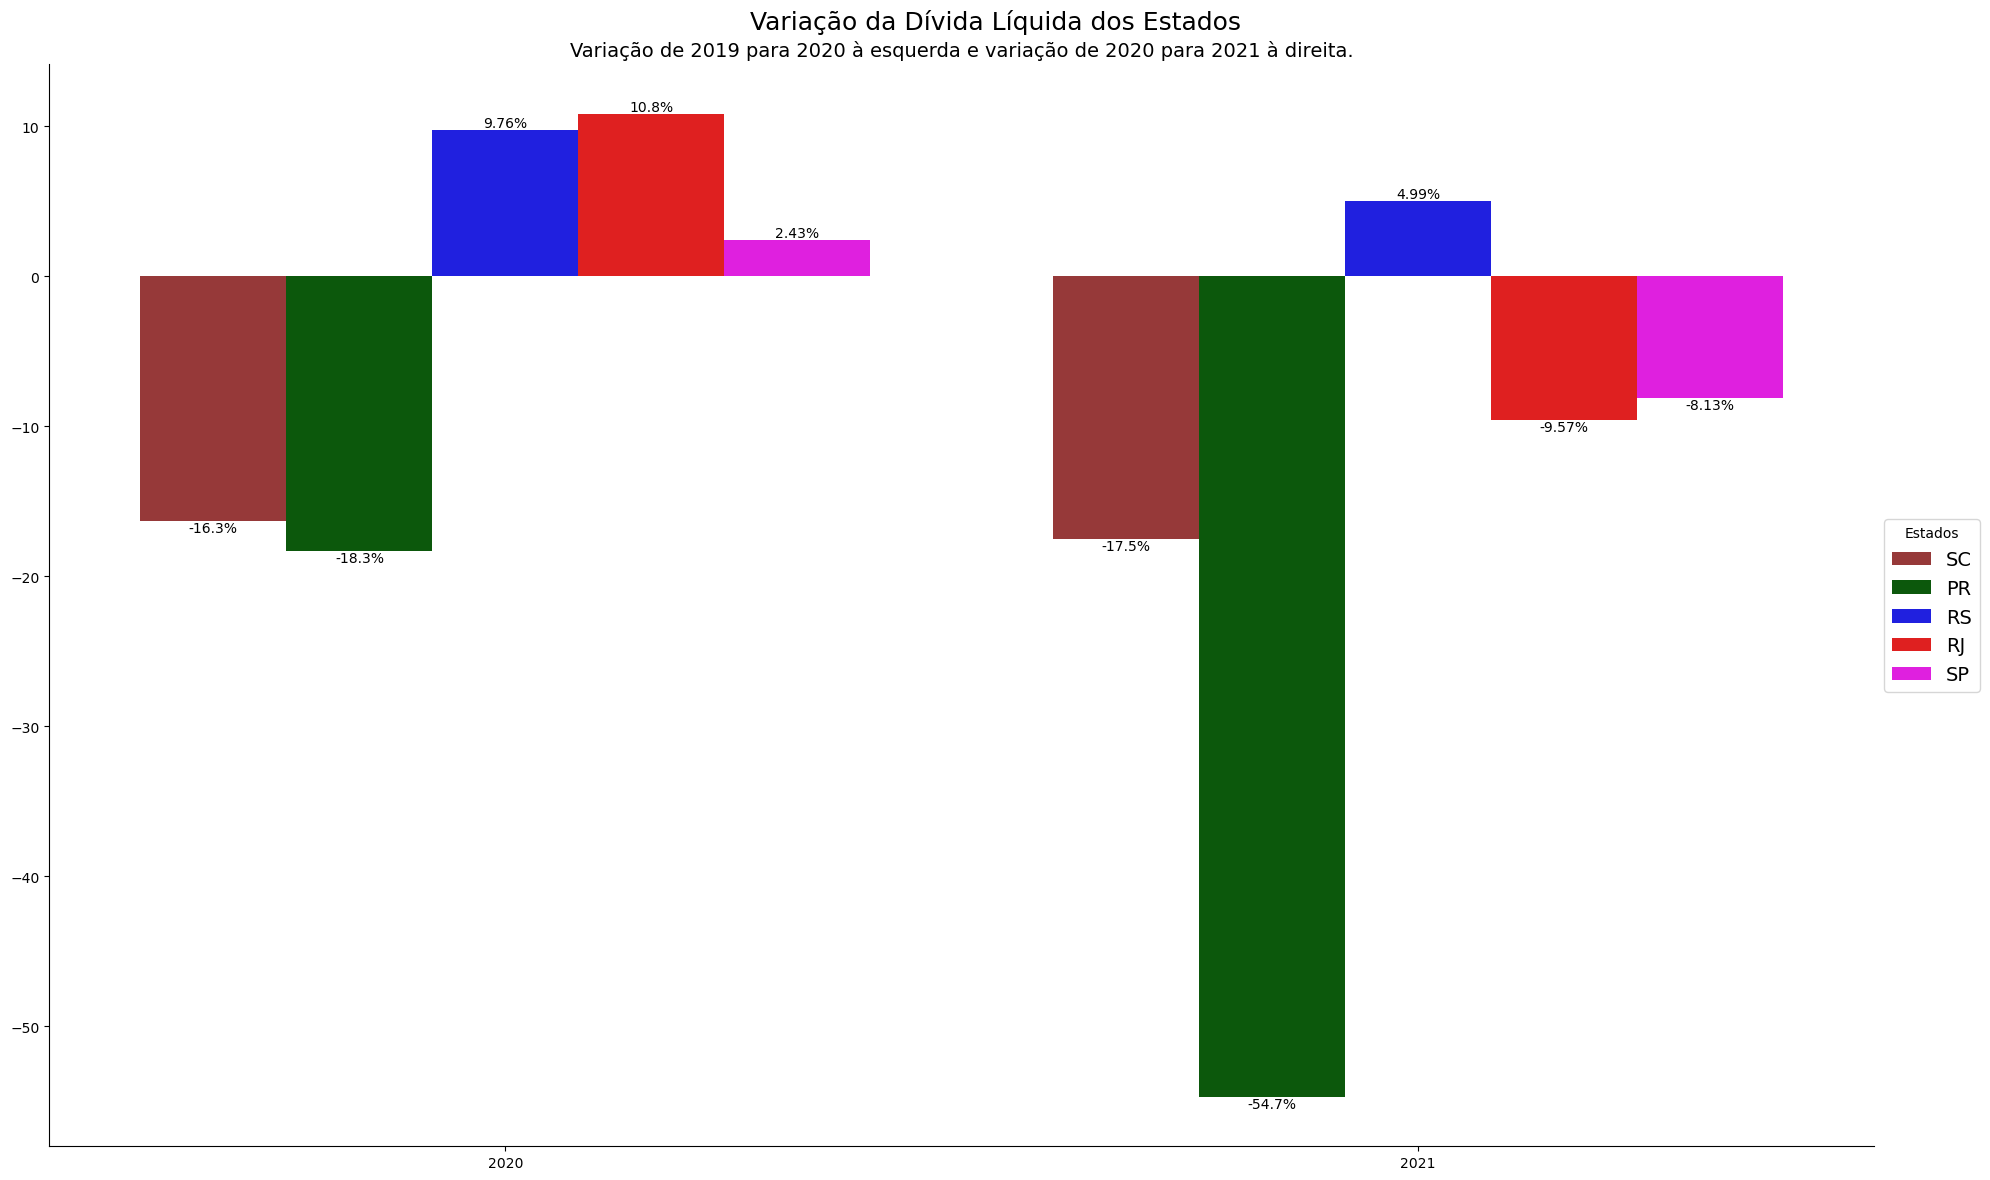

In [52]:
# desconsiderando a inflacao
fig, ax = plt.subplots(figsize = (20, 12))
cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}

sns.barplot(data = df_finan_pub_evolucao[df_finan_pub_evolucao['data'] > '2019'], x = 'data', y = 'diferenca_perc',
            hue = 'estado', palette = cores)

ax.legend(loc = 'center left', title = 'Estados', fontsize = 14, bbox_to_anchor = (1, 0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('')
fig.suptitle('Variação da Dívida Líquida dos Estados', fontsize = 18)
ax.set_title('Variação de 2019 para 2020 à esquerda e variação de 2020 para 2021 à direita.', fontsize = 14)

for container in ax.containers:
    labels = [f'{x:.3}%' for x in container.datavalues]
    ax.bar_label(container, labels = labels)


fig.tight_layout()
plt.savefig('variacao_divida_liquida_anos_recentes')
plt.show();

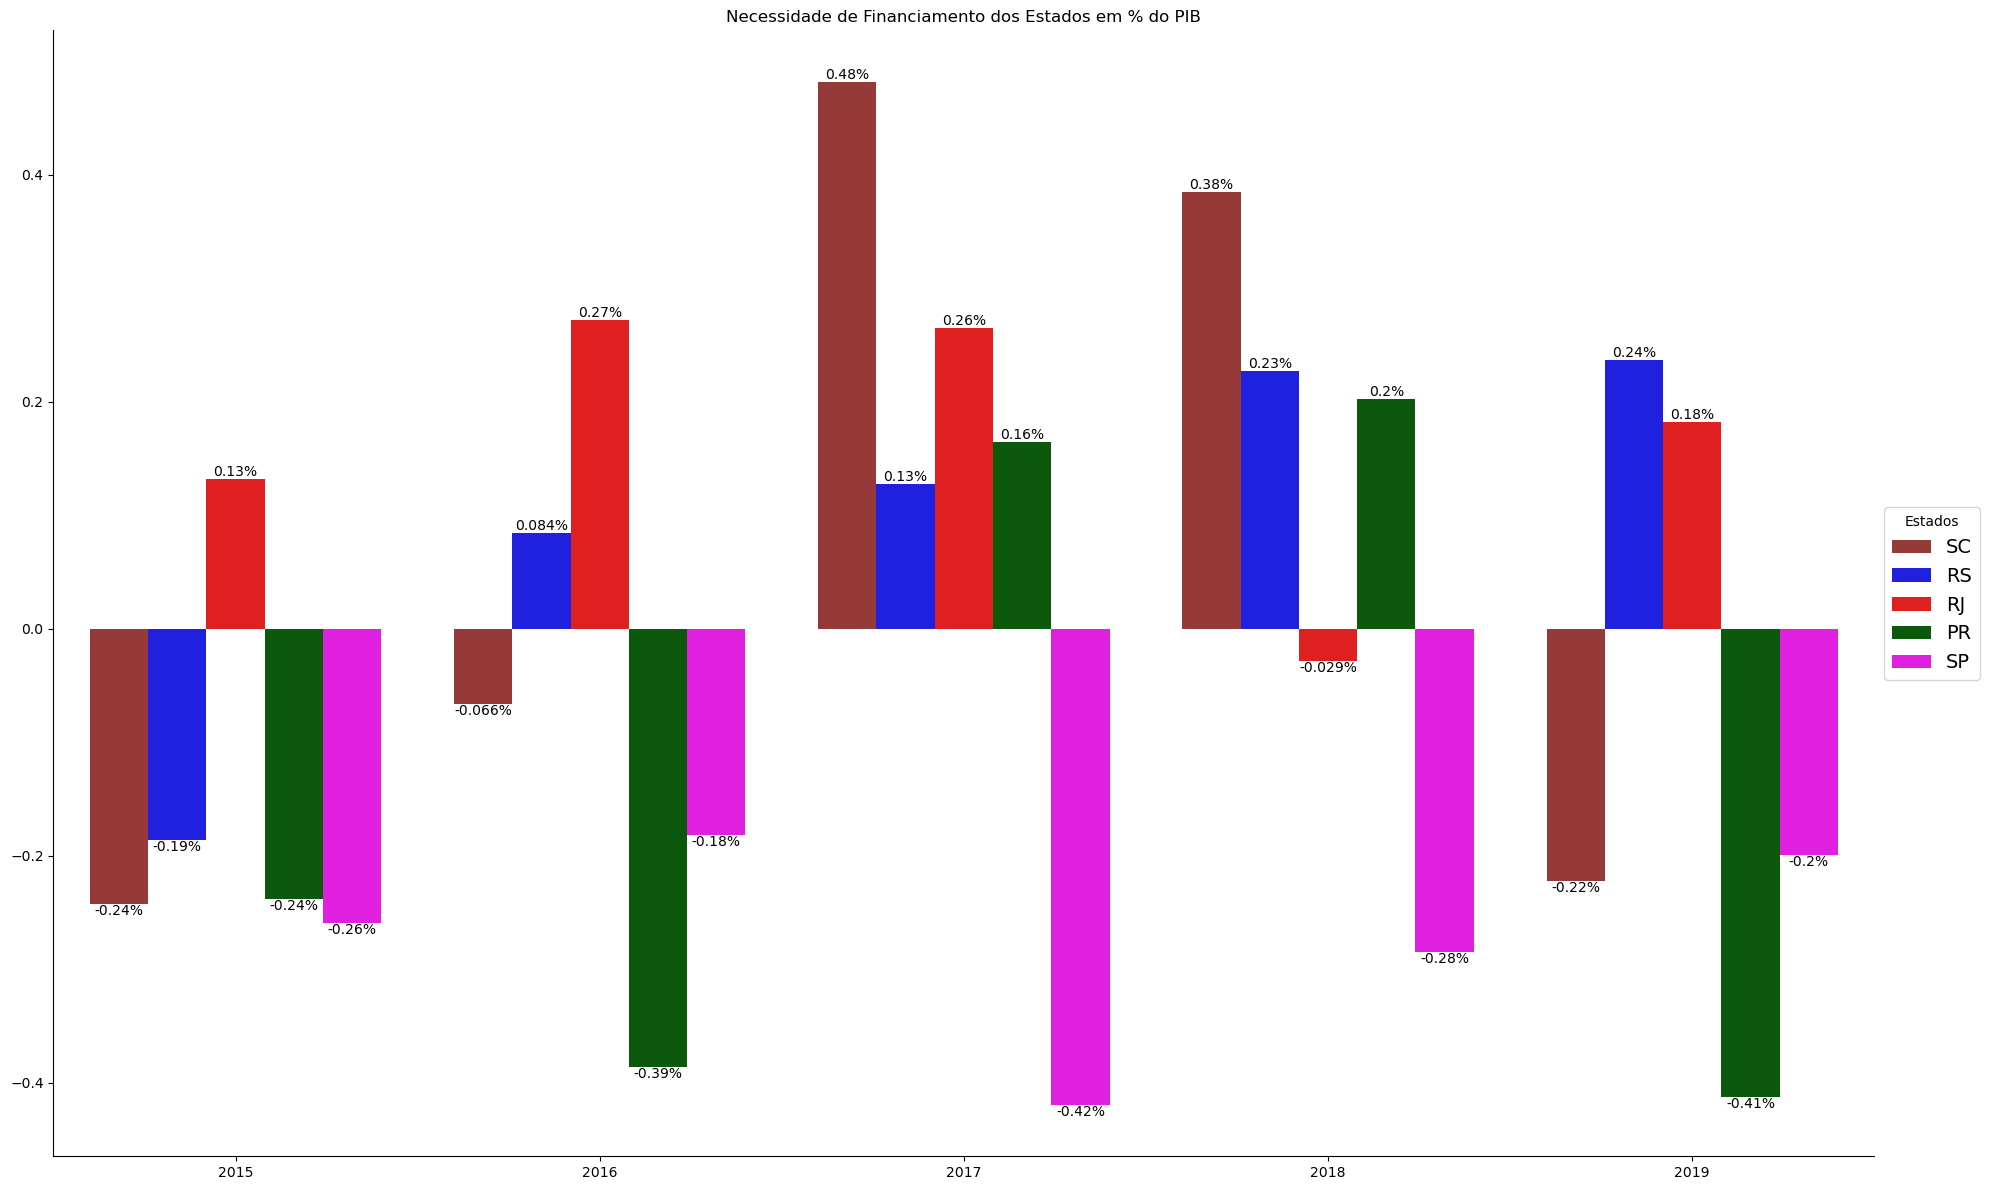

In [53]:
fig, ax = plt.subplots(figsize = (20, 12))
cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}

ax = sns.barplot(data = df_finan_pub_pib, x = 'data', y = 'resultado_prim_pib_perc', hue = 'estado', palette = cores)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc = 'center left', title = 'Estados', fontsize = 14, bbox_to_anchor = (1, 0.5))
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Necessidade de Financiamento dos Estados em % do PIB')
    
for container in ax.containers:
    labels = [f'{x:.2}%' for x in container.datavalues]
    ax.bar_label(container, labels = labels)


fig.tight_layout()
plt.savefig('necessidade_financiamento_estados')
plt.show();

### Comércio Exterior

In [54]:
sc_comercio_ext = pd.read_csv('sc_comercio_ext.csv', sep = ';', encoding = 'iso-8859-1')
pr_comercio_ext = pd.read_csv('pr_comercio_ext.csv', sep = ';', encoding = 'iso-8859-1')
rs_comercio_ext = pd.read_csv('rs_comercio_ext.csv', sep = ';', encoding = 'iso-8859-1')
rj_comercio_ext = pd.read_csv('rj_comercio_ext.csv', sep = ';', encoding = 'iso-8859-1')
sp_comercio_ext = pd.read_csv('sp_comercio_ext.csv', sep = ';', encoding = 'iso-8859-1')

In [55]:
def limpeza(x):
    x.columns = ['data', 'exportacao_US$', 'importacao_US$', 'balanca_comercial_US$']
    x = x.iloc[:-1, :]
    colunas = ['exportacao_US$', 'importacao_US$', 'balanca_comercial_US$']
    x[colunas] = x[colunas].replace(',', '', regex = True)
    x[colunas] = x[colunas].apply(pd.to_numeric, errors = 'coerce')
    x[colunas] = x[colunas] * 1000
    return x

In [56]:
sc_comercio_ext = limpeza(sc_comercio_ext)
pr_comercio_ext = limpeza(pr_comercio_ext)
rs_comercio_ext = limpeza(rs_comercio_ext)
rj_comercio_ext = limpeza(rj_comercio_ext)
sp_comercio_ext = limpeza(sp_comercio_ext)

In [57]:
sc_comercio_ext['estado'] = 'SC'
pr_comercio_ext['estado'] = 'PR'
rs_comercio_ext['estado'] = 'RS'
rj_comercio_ext['estado'] = 'RJ'
sp_comercio_ext['estado'] = 'SP'

In [58]:
df_comercio_ext = pd.concat([sc_comercio_ext, pr_comercio_ext, rs_comercio_ext, rj_comercio_ext, sp_comercio_ext])

In [59]:
df_comercio_ext['data'] = pd.to_datetime(df_comercio_ext['data']).dt.strftime('%Y')

In [60]:
df_comercio_ext = df_comercio_ext.groupby(['data', 'estado']).agg({'exportacao_US$' : sum,
                                                      'importacao_US$' : sum,
                                                      'balanca_comercial_US$' : sum}).reset_index()

In [61]:
df_comercio_ext.head(4)

,data,estado,exportacao_US$,importacao_US$,balanca_comercial_US$
0,2015,PR,14832909000,12490228000,2342683000
1,2015,RJ,14235426000,17192699000,-2957273000
2,2015,RS,17118410000,9966932000,7151478000
3,2015,SC,7640213000,12591718000,-4951502000


In [62]:
# ate 2019 pois so temos valores do PIB ate 2019
df_comercio_ext_pib = df_comercio_ext[df_comercio_ext['data'] <= '2019']

In [63]:
df_comercio_ext_pib.head(4)

,data,estado,exportacao_US$,importacao_US$,balanca_comercial_US$
0,2015,PR,14832909000,12490228000,2342683000
1,2015,RJ,14235426000,17192699000,-2957273000
2,2015,RS,17118410000,9966932000,7151478000
3,2015,SC,7640213000,12591718000,-4951502000


In [64]:
df_comercio_ext_pib = df_comercio_ext_pib.merge(pib_estados, on = ['data', 'estado'], how = 'inner')

In [65]:
cambio_anual = pd.read_csv('cambio_anual.csv', sep = ',')

In [66]:
cambio_anual.columns = ['data', 'taxa_cambio']

In [67]:
cambio_anual['data'] = pd.to_datetime(cambio_anual['data'], format = '%Y').dt.strftime('%Y')

In [68]:
df_comercio_ext_pib = df_comercio_ext_pib.merge(cambio_anual, on = 'data', how = 'inner')

In [69]:
df_comercio_ext_pib['pib_dolar'] = df_comercio_ext_pib['pib'] / df_comercio_ext_pib['taxa_cambio']

In [70]:
df_comercio_ext_pib

,data,estado,exportacao_US$,importacao_US$,balanca_comercial_US$,pib,taxa_cambio,pib_dolar
0,2015,PR,14832909000,12490228000,2342683000,376962821635.88,3.34,112907066114.32
1,2015,RJ,14235426000,17192699000,-2957273000,659138951835.16,3.34,197423833179.13
2,2015,RS,17118410000,9966932000,7151478000,381992601117.90,3.34,114413574480.46
3,2015,SC,7640213000,12591718000,-4951502000,249079642278.97,3.34,74603780596.93
4,2015,SP,45210163000,63694017000,-18483854000,1939901907127.46,3.34,581035105618.19
5,2016,PR,15014900000,11166856000,3848044000,401814164416.15,3.48,115354452506.57
6,2016,RJ,12958896000,12537582000,421315000,640401206452.36,3.48,183848995622.65
7,2016,RS,16191168000,8289152000,7902016000,408789528052.04,3.48,117356968406.98
8,2016,SC,7591470000,10300474000,-2709005000,256754668529.56,3.48,73710179579.58
9,2016,SP,46024595000,51791229000,-5766634000,2038757381638.38,3.48,585294801377.54


In [71]:
colunas = ['exportacao_US$', 'importacao_US$', 'balanca_comercial_US$']
for i in colunas:
    df_comercio_ext_pib[str(i + '_%pib')] = ((df_comercio_ext_pib[i] / df_comercio_ext_pib['pib_dolar']) * 100)

In [72]:
df_comercio_ext_pib.head(6)

,data,estado,exportacao_US$,importacao_US$,balanca_comercial_US$,pib,taxa_cambio,pib_dolar,exportacao_US$_%pib,importacao_US$_%pib,balanca_comercial_US$_%pib
0,2015,PR,14832909000,12490228000,2342683000,376962821635.88,3.34,112907066114.32,13.14,11.06,2.07
1,2015,RJ,14235426000,17192699000,-2957273000,659138951835.16,3.34,197423833179.13,7.21,8.71,-1.50
2,2015,RS,17118410000,9966932000,7151478000,381992601117.90,3.34,114413574480.46,14.96,8.71,6.25
3,2015,SC,7640213000,12591718000,-4951502000,249079642278.97,3.34,74603780596.93,10.24,16.88,-6.64
4,2015,SP,45210163000,63694017000,-18483854000,1939901907127.46,3.34,581035105618.19,7.78,10.96,-3.18
5,2016,PR,15014900000,11166856000,3848044000,401814164416.15,3.48,115354452506.57,13.02,9.68,3.34


In [73]:
df_comercio_ext_pib['exp_plus_imp'] = df_comercio_ext_pib['exportacao_US$'] + df_comercio_ext_pib['importacao_US$']

In [74]:
df_comercio_ext_pib['coef_abertura_comercial'] = ((df_comercio_ext_pib['exp_plus_imp'] / df_comercio_ext_pib['pib_dolar']) * 100)

In [75]:
df_comercio_ext_pib.head(4)

,data,estado,exportacao_US$,importacao_US$,balanca_comercial_US$,pib,taxa_cambio,pib_dolar,exportacao_US$_%pib,importacao_US$_%pib,balanca_comercial_US$_%pib,exp_plus_imp,coef_abertura_comercial
0,2015,PR,14832909000,12490228000,2342683000,376962821635.88,3.34,112907066114.32,13.14,11.06,2.07,27323137000,24.20
1,2015,RJ,14235426000,17192699000,-2957273000,659138951835.16,3.34,197423833179.13,7.21,8.71,-1.50,31428125000,15.92
2,2015,RS,17118410000,9966932000,7151478000,381992601117.90,3.34,114413574480.46,14.96,8.71,6.25,27085342000,23.67
3,2015,SC,7640213000,12591718000,-4951502000,249079642278.97,3.34,74603780596.93,10.24,16.88,-6.64,20231931000,27.12


In [76]:
print('Valor máximo: ' + str(df_comercio_ext_pib['balanca_comercial_US$_%pib'].max()))
print('Valor mínimo: ' + str(df_comercio_ext_pib['balanca_comercial_US$_%pib'].min()))

Valor máximo: 6.73331639975278
Valor mínimo: -9.706043824198028


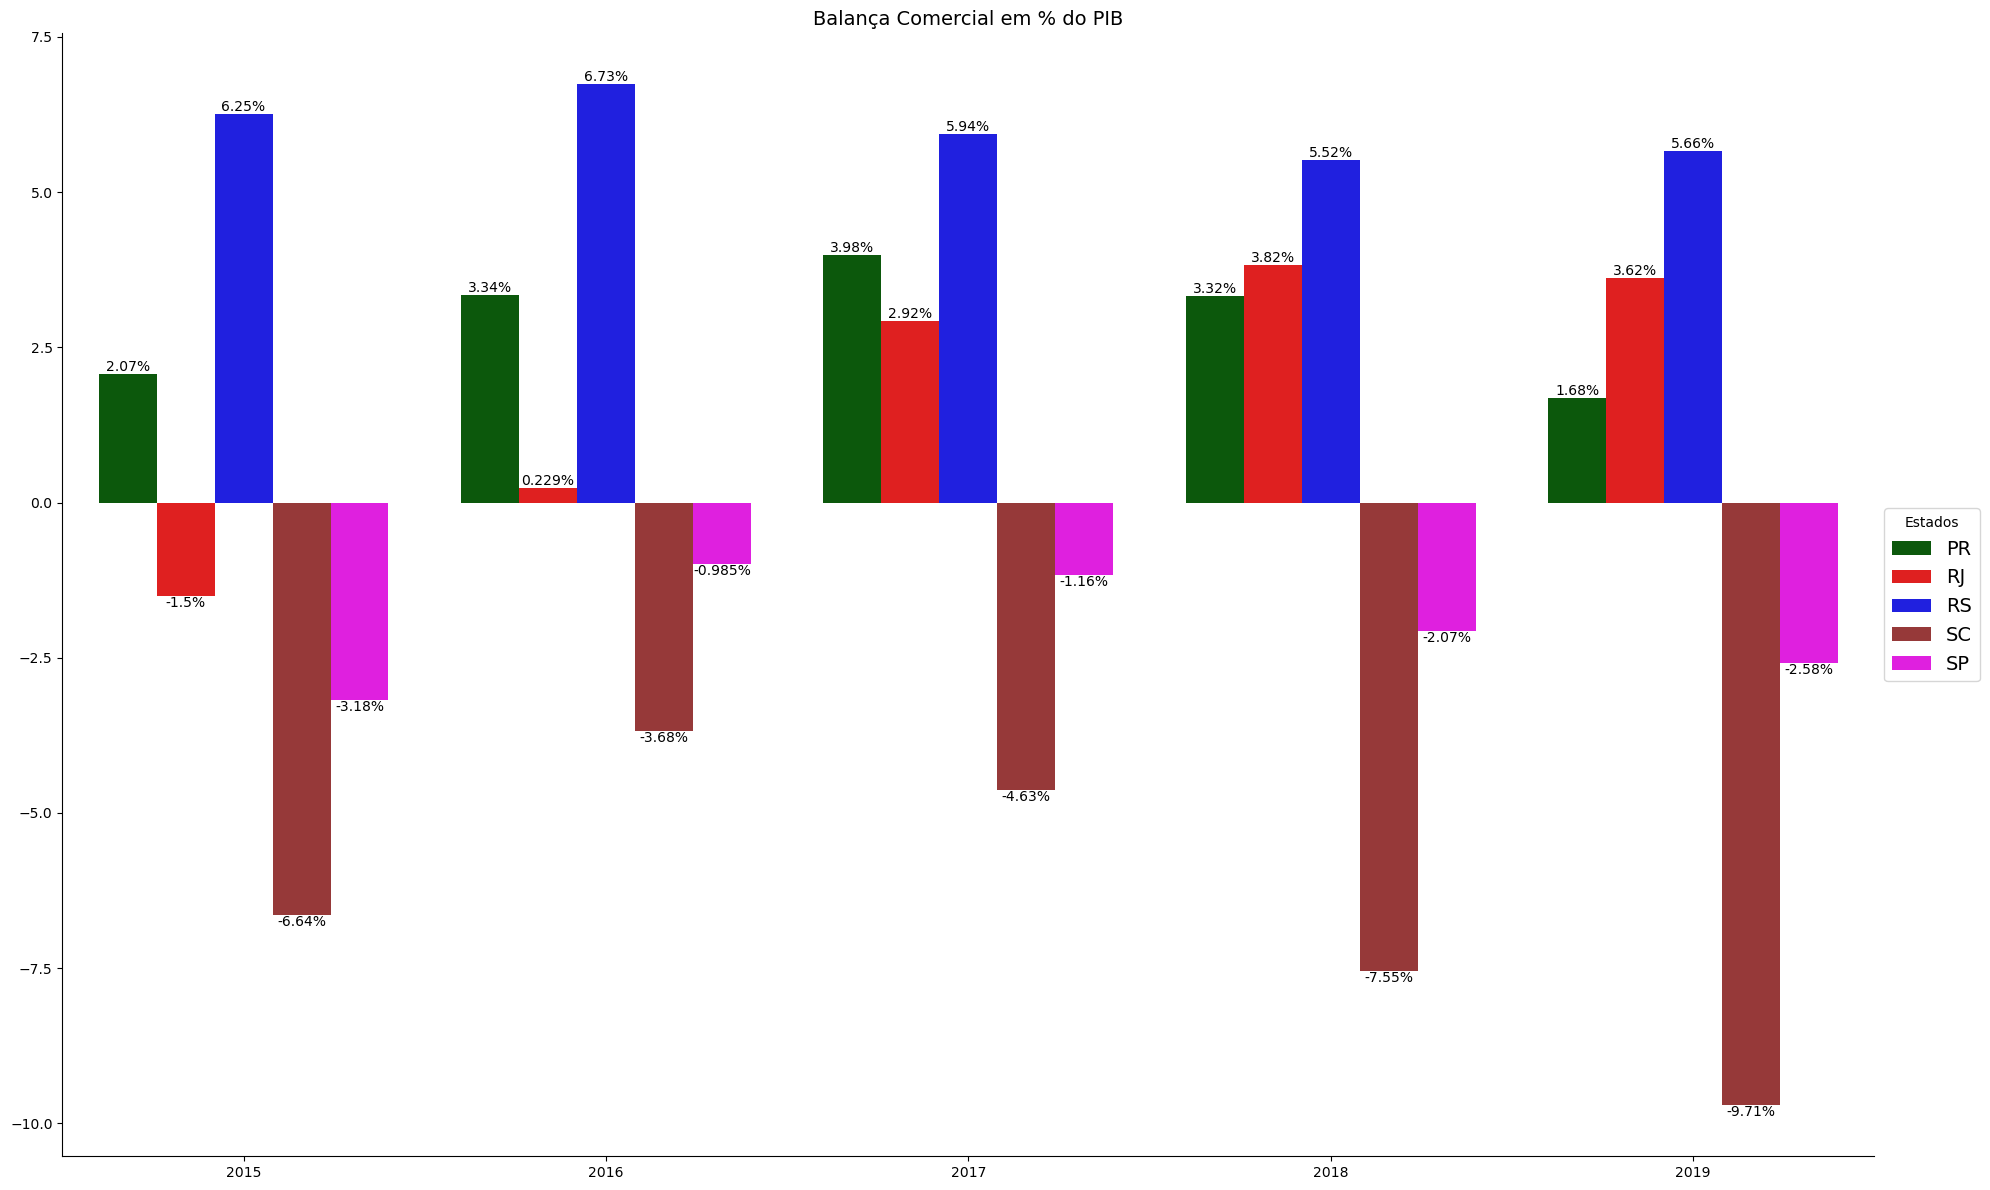

In [77]:
fig, ax = plt.subplots(figsize = (20, 12))
cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}

ax = sns.barplot(data = df_comercio_ext_pib, x = 'data', y = 'balanca_comercial_US$_%pib',
            hue = 'estado', palette = cores)

ax.legend(loc = 'center left', title = 'Estados', fontsize = 14, bbox_to_anchor = (1, 0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Balança Comercial em % do PIB', fontsize = 14)

for container in ax.containers:
    labels = [f'{x:.3}%' for x in container.datavalues]
    ax.bar_label(container, labels = labels)


fig.tight_layout()
plt.savefig('balanca_comercial')    
plt.show();

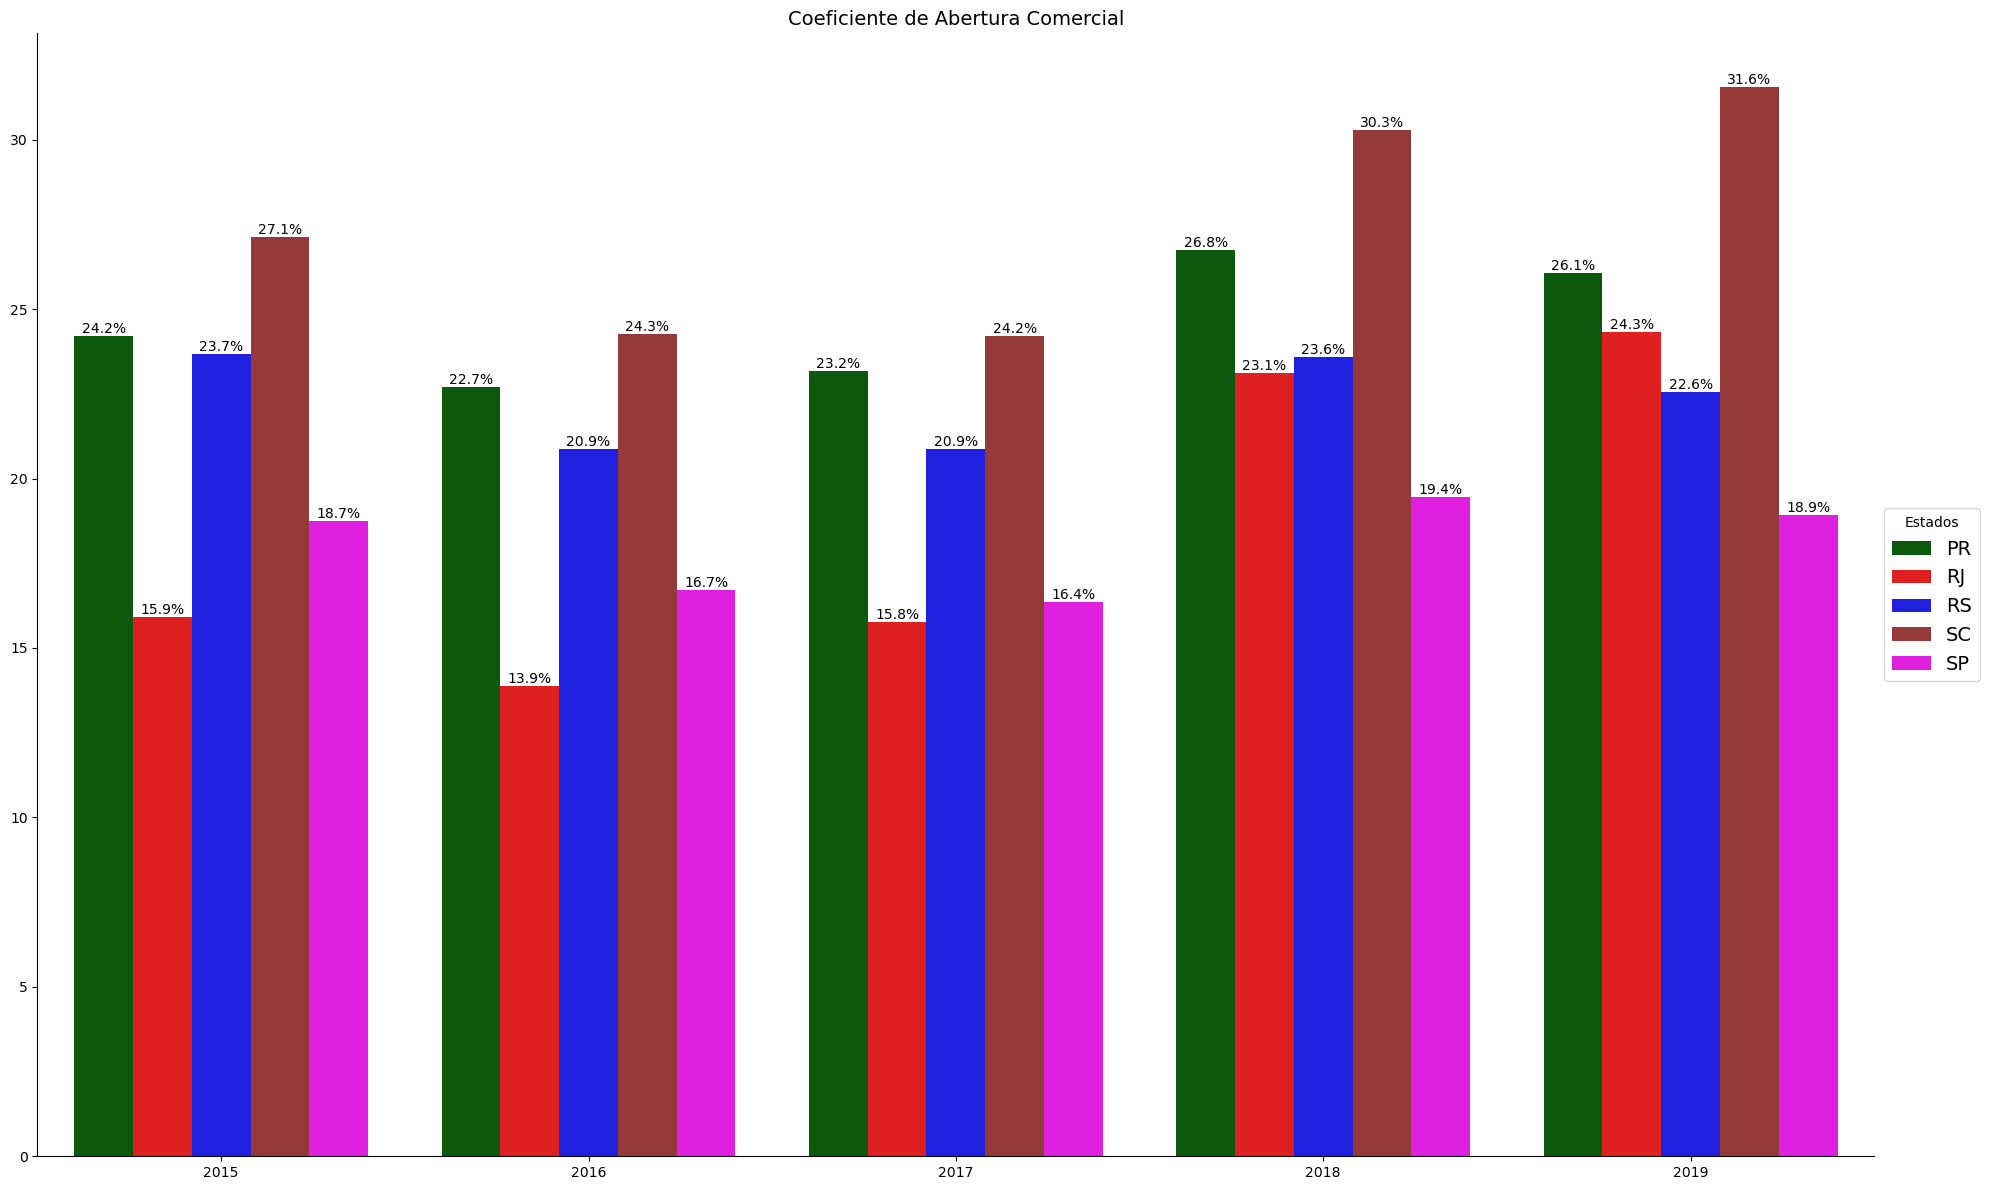

In [78]:
fig, ax = plt.subplots(figsize = (20, 12))
cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}

sns.barplot(data = df_comercio_ext_pib, x = 'data', y = 'coef_abertura_comercial',
            hue = 'estado', palette = cores)

ax.legend(loc = 'center left', title = 'Estados', fontsize = 14, bbox_to_anchor = (1, 0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Coeficiente de Abertura Comercial', fontsize = 14)

for container in ax.containers:
    labels = [f'{x:.3}%' for x in container.datavalues]
    ax.bar_label(container, labels = labels)


fig.tight_layout()
plt.savefig('coef_abertura_comercial')    
plt.show();

#### O que é exportado?
Site comexstat. Configuracao para download: Filtros: UF do Produto, Pais, Via, CGCE Nivel 2

##### Exportação!

In [79]:
pauta_exp = pd.read_csv('pauta_exportadora.csv', sep = ';')

In [80]:
pauta_exp = pauta_exp.iloc[:, [0, 1, 3, 4]]

In [81]:
pauta_exp.columns = ['ano', 'estado', 'descricao_item', 'valor_dolar_milhoes']
pauta_exp['valor_dolar_milhoes'] = pauta_exp['valor_dolar_milhoes'] / 1000000

In [82]:
pauta_exp = pauta_exp[pauta_exp['ano'] == 2022]

In [83]:
pauta_exp.head(4)

,ano,estado,descricao_item,valor_dolar_milhoes
0,2022,Rio de Janeiro,Combustíveis e lubrificantes básicos,20540.25
1,2022,São Paulo,Insumos industriais elaborados,11278.46
2,2022,São Paulo,Bens de consumo semiduráveis e não duráveis,6630.21
3,2022,Paraná,Insumos industriais elaborados,4766.70


In [84]:
top_expor = pauta_exp.groupby(['estado'])['ano', 'descricao_item',
                        'valor_dolar_milhoes'].apply(lambda x: x.nlargest(3, columns = ['valor_dolar_milhoes'])).reset_index()

In [85]:
top_expor = top_expor.iloc[:, [0, 3, 4]]

In [86]:
top_expor = top_expor.groupby(['estado']).apply(lambda df: df.sort_values(by = ['valor_dolar_milhoes'], ascending = False)).iloc[:, 1:3]

In [87]:
top_expor

descricao_item  \
estado                                                                    
Paraná            0                      Insumos industriais elaborados   
                  1         Bens de consumo semiduráveis e não duráveis   
                  2   Alimentos e bebidas básicos, destinados princi...   
Rio Grande do Sul 3                      Insumos industriais elaborados   
                  4   Alimentos e bebidas básicos, destinados princi...   
                  5         Bens de consumo semiduráveis e não duráveis   
Rio de Janeiro    6                Combustíveis e lubrificantes básicos   
                  7                      Insumos industriais elaborados   
                  8             Combustíveis e lubrificantes elaborados   
Santa Catarina    9                      Insumos industriais elaborados   
                  10        Bens de consumo semiduráveis e não duráveis   
                  11  Alimentos e bebidas elaborados, destinados pri...   
São Paulo         12                     Insumos industriais elaborados   
                  13        Bens de consumo semiduráveis e não duráveis   
                  14               Combustíveis e lubrificantes básicos   

                      valor_dolar_milhoes  
estado                                     
Paraná            0               4766.70  
                  1               3274.43  
                  2               2929.03  
Rio Grande do Sul 3               4347.14  
                  4               2646.92  
                  5               2615.72  
Rio de Janeiro    6              20540.25  
                  7               3672.73  
                  8               1398.33  
Santa Catarina    9               2602.24  
                  10              1957.91  
                  11               902.43  
São Paulo         12             11278.46  
                  13              6630.21  
                  14              3969.87

##### Importação!

In [88]:
pauta_imp = pd.read_csv('pauta_importadora.csv', sep = ';')

In [89]:
pauta_imp = pauta_imp.iloc[:, [0, 1, 3, 4]]

In [90]:
pauta_imp.columns = ['ano', 'estado', 'descricao_item', 'valor_dolar_milhoes']
pauta_imp['valor_dolar_milhoes'] = pauta_imp['valor_dolar_milhoes'] / 1000000

In [91]:
pauta_imp = pauta_imp[pauta_imp['ano'] == 2022]

In [92]:
pauta_imp.head(4)

,ano,estado,descricao_item,valor_dolar_milhoes
0,2022,São Paulo,Insumos industriais elaborados,21569.94
1,2022,Santa Catarina,Insumos industriais elaborados,9629.70
2,2022,São Paulo,Peças e acessórios para bens de capital,8616.48
3,2022,Paraná,Insumos industriais elaborados,6692.34


In [93]:
top_impor = pauta_imp.groupby(['estado'])['ano', 'descricao_item',
                        'valor_dolar_milhoes'].apply(lambda x: x.nlargest(3, columns = ['valor_dolar_milhoes'])).reset_index()

In [94]:
top_impor = top_impor.iloc[:, [0, 3, 4]]

In [95]:
top_impor = top_impor.groupby(['estado']).apply(lambda df: df.sort_values(by = ['valor_dolar_milhoes'], ascending = False)).iloc[:, 1:3]

In [96]:
top_impor

descricao_item  \
estado                                                                    
Paraná            0                      Insumos industriais elaborados   
                  1               Peças para equipamentos de transporte   
                  2             Combustíveis e lubrificantes elaborados   
Rio Grande do Sul 3                      Insumos industriais elaborados   
                  4                Combustíveis e lubrificantes básicos   
                  5               Equipamentos de transporte industrial   
Rio de Janeiro    6                Combustíveis e lubrificantes básicos   
                  7               Peças para equipamentos de transporte   
                  8                      Insumos industriais elaborados   
Santa Catarina    9                      Insumos industriais elaborados   
                  10        Bens de consumo semiduráveis e não duráveis   
                  11  Bens de capital, exceto equipamentos de transp...   
São Paulo         12                     Insumos industriais elaborados   
                  13            Peças e acessórios para bens de capital   
                  14        Bens de consumo semiduráveis e não duráveis   

                      valor_dolar_milhoes  
estado                                     
Paraná            0               6692.34  
                  1               1517.83  
                  2               1483.37  
Rio Grande do Sul 3               4629.28  
                  4               1034.99  
                  5                721.40  
Rio de Janeiro    6               4522.68  
                  7               3899.46  
                  8               3323.86  
Santa Catarina    9               9629.70  
                  10              2756.13  
                  11              2005.22  
São Paulo         12             21569.94  
                  13              8616.48  
                  14              5988.87

##### Países para qual esses Estados exportam e importam!

In [97]:
paises_exp = pd.read_csv('exportacao_paises.csv', sep = ';')

In [98]:
paises_exp.columns = ['ano', 'estado', 'paises', 'valor_dolar_milhoes']
paises_exp['valor_dolar_milhoes'] = paises_exp['valor_dolar_milhoes'] / 1000000

In [99]:
paises_exp = paises_exp[paises_exp['ano'] == 2022]

In [100]:
paises_exp.head(4)

,ano,estado,paises,valor_dolar_milhoes
0,2022,Rio de Janeiro,China,8157.95
1,2022,São Paulo,China,7610.49
2,2022,São Paulo,Estados Unidos,7316.75
3,2022,Rio de Janeiro,Estados Unidos,4550.65


In [101]:
top_paises_exp = paises_exp.groupby(['estado'])['ano', 'paises',
                        'valor_dolar_milhoes'].apply(lambda x: x.nlargest(3, columns = ['valor_dolar_milhoes'])).reset_index()

In [102]:
top_paises_exp = top_paises_exp.iloc[:, [0, 3, 4]]

In [103]:
top_paises_exp = top_paises_exp.groupby(['estado']).apply(lambda df: df.sort_values(by = ['valor_dolar_milhoes'], ascending = False)).iloc[:, 1:3]

In [104]:
top_paises_exp

paises  valor_dolar_milhoes
estado                                                   
Paraná            0            China              2876.21
                  1   Estados Unidos              1208.91
                  2        Argentina               886.37
Rio Grande do Sul 3            China              2629.73
                  4   Estados Unidos              1449.49
                  5        Argentina               893.38
Rio de Janeiro    6            China              8157.95
                  7   Estados Unidos              4550.65
                  8            Chile              1988.66
Santa Catarina    9   Estados Unidos              1511.32
                  10           China              1149.20
                  11       Argentina               566.37
São Paulo         12           China              7610.49
                  13  Estados Unidos              7316.75
                  14       Argentina              4478.10

In [105]:
paises_imp = pd.read_csv('importacao_paises.csv', sep = ';')

In [106]:
paises_imp.columns = ['ano', 'estado', 'paises', 'valor_dolar_milhoes']
paises_imp['valor_dolar_milhoes'] = paises_imp['valor_dolar_milhoes'] / 1000000

In [107]:
paises_imp = paises_imp[paises_imp['ano'] == 2022]

In [108]:
top_paises_imp = paises_imp.groupby(['estado'])['ano', 'paises',
                        'valor_dolar_milhoes'].apply(lambda x: x.nlargest(3, columns = ['valor_dolar_milhoes'])).reset_index()

In [109]:
top_paises_imp = top_paises_imp.iloc[:, [0, 3, 4]]

In [110]:
top_paises_imp = top_paises_imp.groupby(['estado']).apply(lambda df: df.sort_values(by = ['valor_dolar_milhoes'], ascending = False)).iloc[:, 1:3]

In [111]:
top_paises_imp

paises  valor_dolar_milhoes
estado                                                   
Paraná            0            China              3815.83
                  1   Estados Unidos              2005.29
                  2         Paraguai               628.94
Rio Grande do Sul 3        Argentina              1657.42
                  4   Estados Unidos              1519.56
                  5            China              1360.30
Rio de Janeiro    6   Estados Unidos              5463.81
                  7   Arábia Saudita              2032.62
                  8            China              1210.68
Santa Catarina    9            China              7368.97
                  10           Chile              1308.14
                  11       Argentina              1178.53
São Paulo         12           China             12126.55
                  13  Estados Unidos              9871.85
                  14        Alemanha              4000.20

##### Qual é a via utilizada por esses Estados!

In [112]:
via_exp = pd.read_csv('exportacao_via.csv', sep = ';')

In [113]:
via_exp.columns = ['ano', 'estado', 'via', 'valor_dolar_milhoes']
via_exp['valor_dolar_milhoes'] = via_exp['valor_dolar_milhoes'] / 1000000

In [114]:
via_exp = via_exp[via_exp['ano'] == 2022]

In [115]:
top_via_exp = via_exp.groupby(['estado'])['ano', 'via',
                        'valor_dolar_milhoes'].apply(lambda x: x.nlargest(3, columns = ['valor_dolar_milhoes'])).reset_index()

In [116]:
top_via_exp = top_via_exp.iloc[:, [0, 3, 4]]

In [117]:
top_via_exp = top_via_exp.groupby(['estado']).apply(lambda df: df.sort_values(by = ['valor_dolar_milhoes'], ascending = False)).iloc[:, 1:3]

In [118]:
top_via_exp

via  valor_dolar_milhoes
estado                                               
Paraná            0     MARITIMA             12717.93
                  1   RODOVIARIA              1827.19
                  2        AEREA               281.44
Rio Grande do Sul 3     MARITIMA             11734.16
                  4   RODOVIARIA              2050.26
                  5        AEREA               551.07
Rio de Janeiro    6     MARITIMA             26156.03
                  7        AEREA               755.14
                  8   RODOVIARIA               484.57
Santa Catarina    9     MARITIMA              6721.40
                  10  RODOVIARIA              1226.11
                  11       AEREA               220.51
São Paulo         12    MARITIMA             33988.57
                  13  RODOVIARIA              5872.19
                  14       AEREA              4902.97

In [119]:
via_imp = pd.read_csv('importacao_via.csv', sep = ';')

In [120]:
via_imp.columns = ['ano', 'estado', 'via', 'valor_dolar_milhoes']
via_imp['valor_dolar_milhoes'] = via_imp['valor_dolar_milhoes'] / 1000000

In [121]:
via_imp = via_imp[via_imp['ano'] == 2022]

In [122]:
top_via_imp = via_imp.groupby(['estado'])['ano', 'via',
                        'valor_dolar_milhoes'].apply(lambda x: x.nlargest(3, columns = ['valor_dolar_milhoes'])).reset_index()

In [123]:
top_via_imp = top_via_imp.iloc[:, [0, 3, 4]]

In [124]:
top_via_imp = top_via_imp.groupby(['estado']).apply(lambda df: df.sort_values(by = ['valor_dolar_milhoes'], ascending = False)).iloc[:, 1:3]

In [125]:
top_via_imp

via  valor_dolar_milhoes
estado                                                                
Paraná            0                      MARITIMA             12856.36
                  1                    RODOVIARIA              1004.22
                  2                         AEREA               946.90
Rio Grande do Sul 3                      MARITIMA              7447.80
                  4                    RODOVIARIA              1544.54
                  5                         AEREA               539.71
Rio de Janeiro    6                      MARITIMA             10065.08
                  7                         AEREA              5532.08
                  8   CONDUTO/REDE DE TRANSMISSAO               859.82
Santa Catarina    9                      MARITIMA             15887.20
                  10                   RODOVIARIA              1635.60
                  11                        AEREA              1187.98
São Paulo         12                     MARITIMA             38731.25
                  13                        AEREA             13481.25
                  14                   RODOVIARIA              1730.81

### Crédito

In [126]:
sc_credito = pd.read_csv('sc_credito.csv', sep = ';', encoding = 'iso-8859-1')
pr_credito = pd.read_csv('pr_credito.csv', sep = ';', encoding = 'iso-8859-1')
rs_credito = pd.read_csv('rs_credito.csv', sep = ';', encoding = 'iso-8859-1')
rj_credito = pd.read_csv('rj_credito.csv', sep = ';', encoding = 'iso-8859-1')
sp_credito = pd.read_csv('sp_credito.csv', sep = ';', encoding = 'iso-8859-1')

In [127]:
def limpeza(x):
    x.columns = ['data', 'saldo_operacoes_cred_pessoas', 'saldo_operacoes_cred_corporacoes',
                'taxa_inadimplencia_pessoas', 'taxa_inadimplencia_corporacoes']
    colunas = ['saldo_operacoes_cred_pessoas', 'saldo_operacoes_cred_corporacoes']
    x[colunas] = x[colunas].replace(',', '', regex = True)
    x[colunas] = x[colunas].apply(pd.to_numeric, errors = 'coerce')
    x[colunas] = x[colunas] * 1000000
    x['data'] = x['data'].str.replace('/', '-')
    x = x.iloc[:-1, :]
    return x

In [128]:
sc_credito = limpeza(sc_credito)
pr_credito = limpeza(pr_credito)
rs_credito = limpeza(rs_credito)
rj_credito = limpeza(rj_credito)
sp_credito = limpeza(sp_credito)

In [129]:
sc_credito['estado'] = 'SC'
pr_credito['estado'] = 'PR'
rs_credito['estado'] = 'RS'
rj_credito['estado'] = 'RJ'
sp_credito['estado'] = 'SP'

In [130]:
df_credito = pd.concat([sc_credito, pr_credito, rs_credito, rj_credito, sp_credito])

In [131]:
colunas = ['taxa_inadimplencia_pessoas', 'taxa_inadimplencia_corporacoes']
df_credito[colunas] = df_credito[colunas].apply(pd.to_numeric, errors = 'coerce')

In [132]:
df_credito['data'] = pd.to_datetime(df_credito['data']).dt.strftime('%Y')
df_credito = df_credito.groupby(['data', 'estado']).agg({'saldo_operacoes_cred_pessoas' : 'mean',
                                                      'saldo_operacoes_cred_corporacoes' : 'mean',
                                                      'taxa_inadimplencia_pessoas' : 'mean',
                                                      'taxa_inadimplencia_corporacoes' : 'mean'}).reset_index()

In [133]:
df_credito_pib = df_credito[df_credito['data'] <= '2019']

In [134]:
df_credito_pib = df_credito_pib.merge(pib_estados, on = ['data', 'estado'], how = 'inner')

In [135]:
df_credito_pib['saldo_ope_pessoas_%pib'] = ((df_credito_pib['saldo_operacoes_cred_pessoas'] / df_credito_pib['pib']) * 100)
df_credito_pib['saldo_ope_corp_%pib'] = ((df_credito_pib['saldo_operacoes_cred_corporacoes'] / df_credito_pib['pib']) * 100)

In [136]:
df_credito_pib

,data,estado,saldo_operacoes_cred_pessoas,saldo_operacoes_cred_corporacoes,taxa_inadimplencia_pessoas,taxa_inadimplencia_corporacoes,pib,saldo_ope_pessoas_%pib,saldo_ope_corp_%pib
0,2015,PR,109971166666.67,97198500000.00,2.87,2.60,376962821635.88,29.17,25.78
1,2015,RJ,117992750000.00,303739833333.33,4.78,1.27,659138951835.16,17.90,46.08
2,2015,RS,112849416666.67,83211750000.00,2.76,3.28,381992601117.90,29.54,21.78
3,2015,SC,66133333333.33,75086416666.67,2.68,2.09,249079642278.97,26.55,30.15
4,2015,SP,390110666666.67,528836083333.33,3.67,2.05,1939901907127.46,20.11,27.26
5,2016,PR,116304083333.33,90737500000.00,2.99,3.65,401814164416.15,28.94,22.58
6,2016,RJ,119202833333.33,311308333333.33,5.30,1.82,640401206452.36,18.61,48.61
7,2016,RS,118042166666.67,78554916666.67,2.93,4.03,408789528052.04,28.88,19.22
8,2016,SC,69499916666.67,74798166666.67,2.89,3.14,256754668529.56,27.07,29.13
9,2016,SP,406721333333.33,521380416666.67,3.75,2.43,2038757381638.38,19.95,25.57


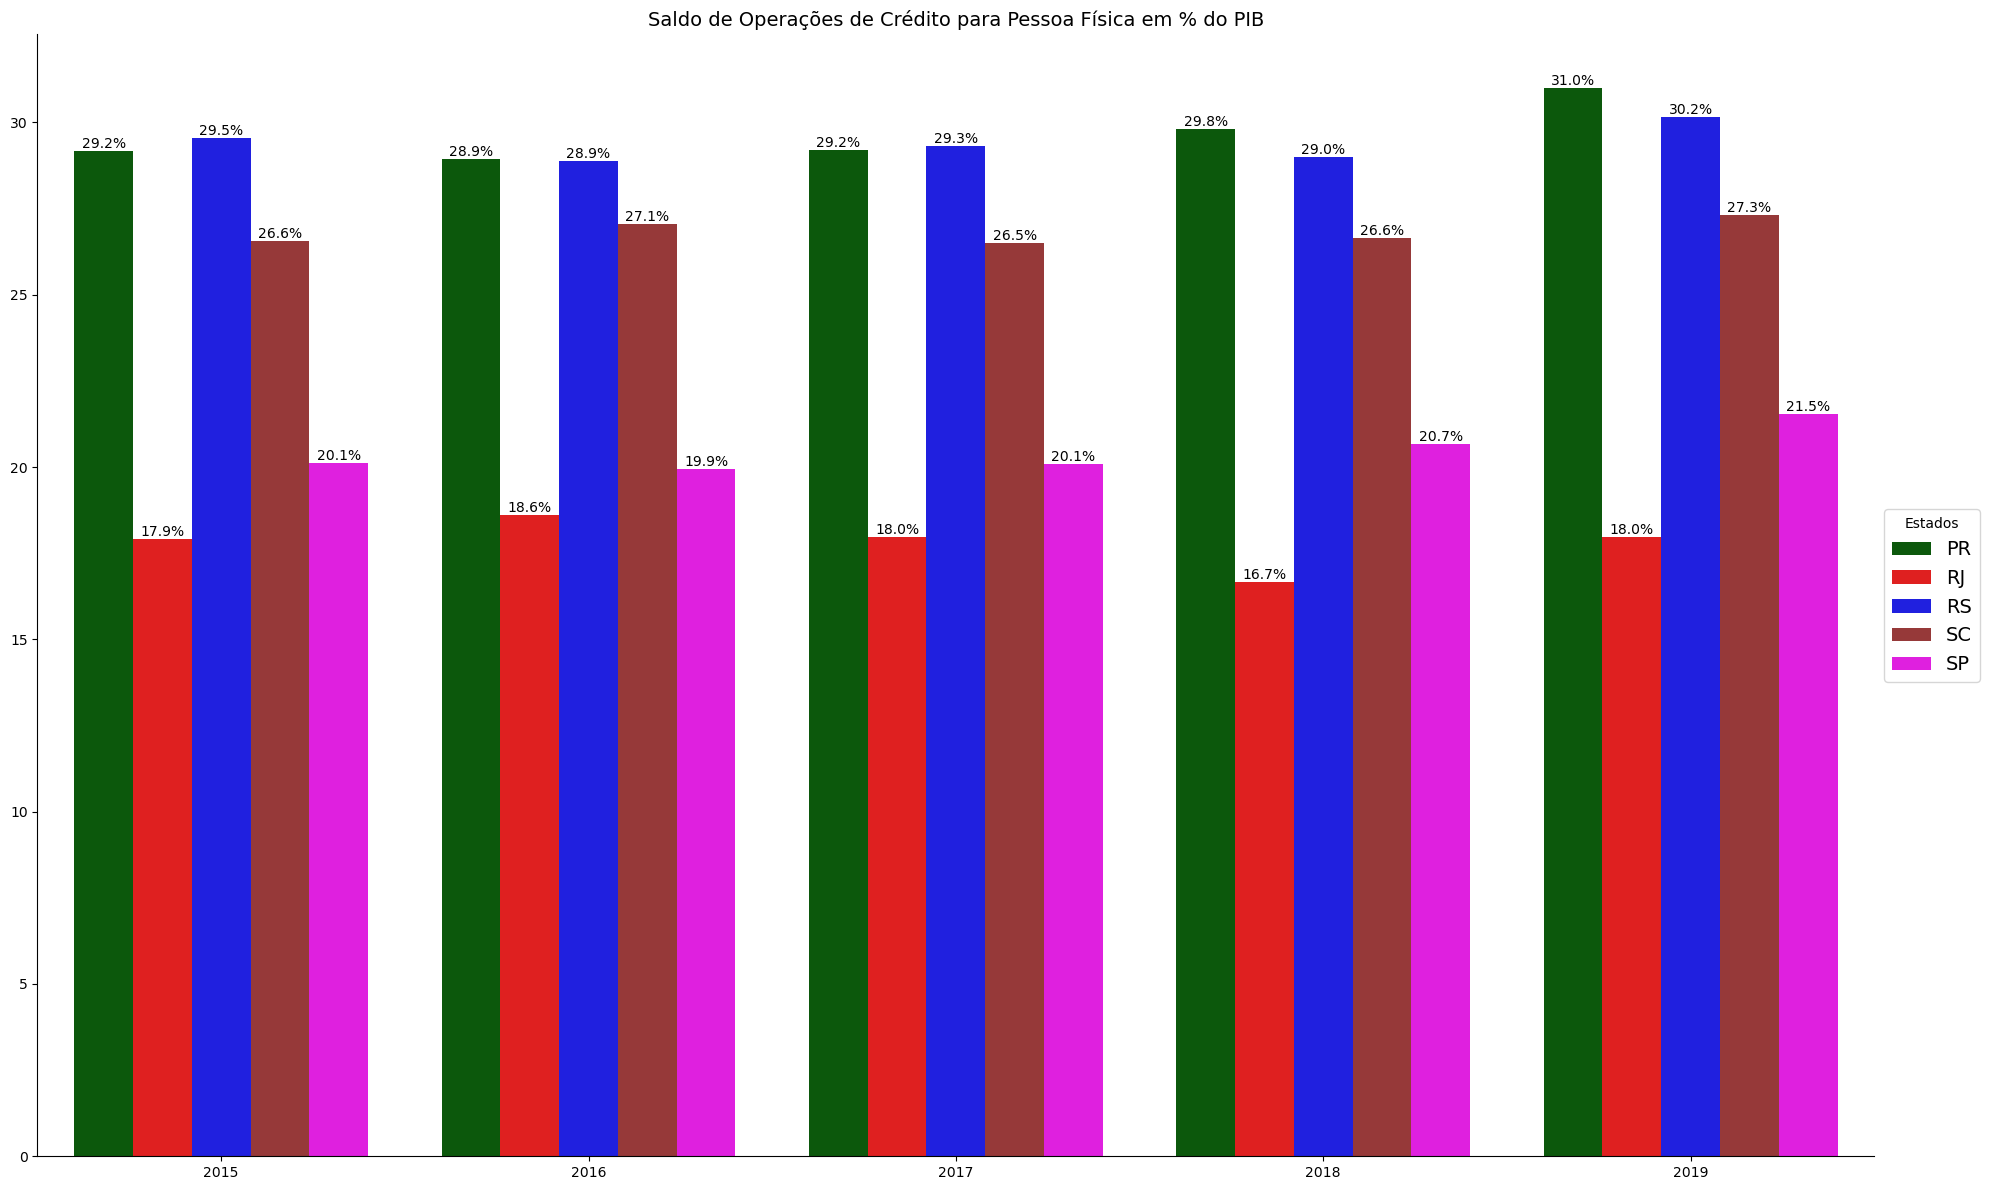

In [137]:
fig, ax = plt.subplots(figsize = (20, 12))
cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}

sns.barplot(data = df_credito_pib, x = 'data', y = 'saldo_ope_pessoas_%pib',
            hue = 'estado', palette = cores)

ax.legend(loc = 'center left', title = 'Estados', fontsize = 14, bbox_to_anchor = (1, 0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Saldo de Operações de Crédito para Pessoa Física em % do PIB', fontsize = 14)

for container in ax.containers:
    labels = [f'{x:.3}%' for x in container.datavalues]
    ax.bar_label(container, labels = labels)

    
fig.tight_layout()
plt.savefig('saldo_opera_pessoa') 
plt.show();

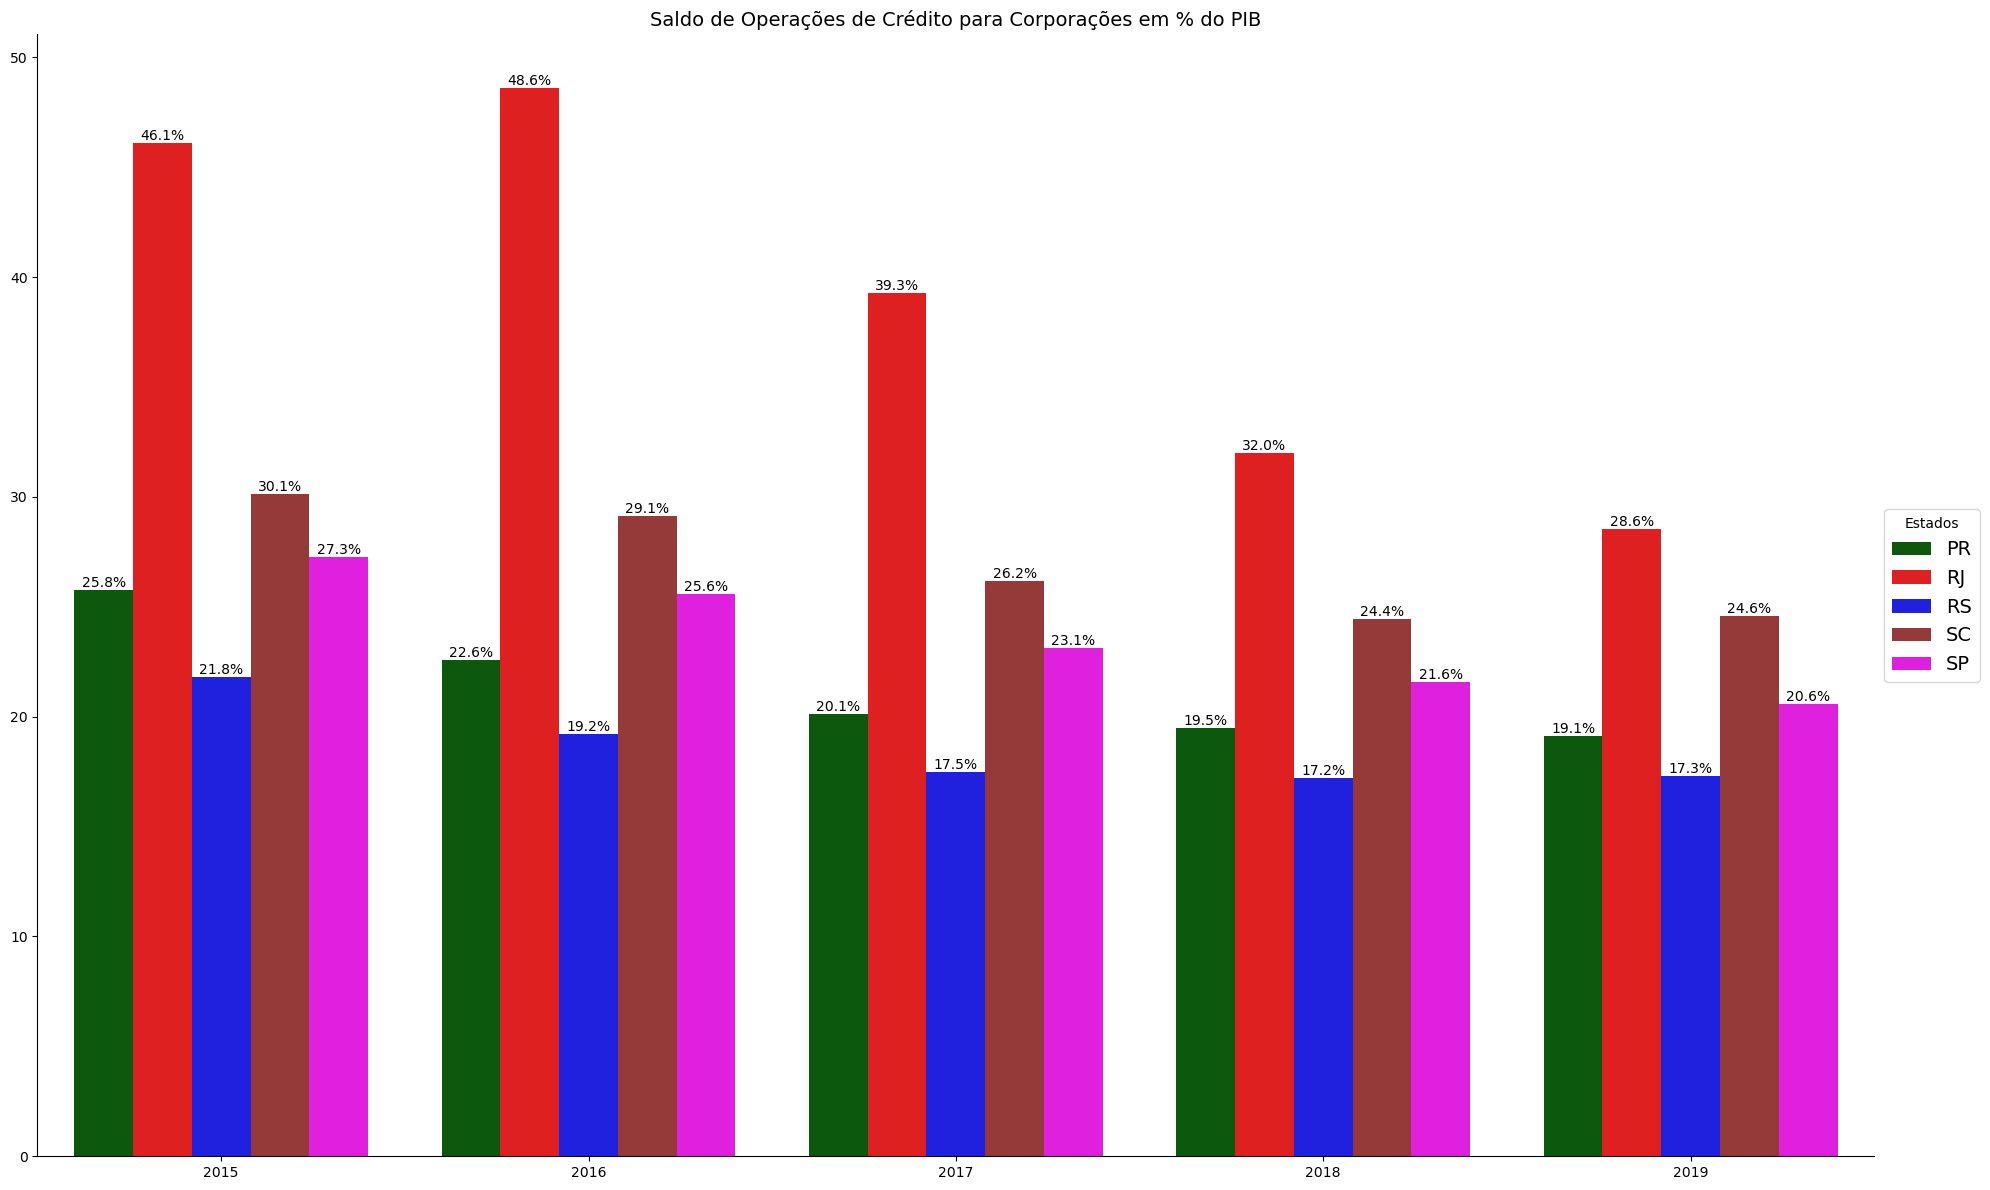

In [138]:
fig, ax = plt.subplots(figsize = (20, 12))
cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}

sns.barplot(data = df_credito_pib, x = 'data', y = 'saldo_ope_corp_%pib',
            hue = 'estado', palette = cores)

ax.legend(loc = 'center left', title = 'Estados', fontsize = 14, bbox_to_anchor = (1, 0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Saldo de Operações de Crédito para Corporações em % do PIB', fontsize = 14)

for container in ax.containers:
    labels = [f'{x:.3}%' for x in container.datavalues]
    ax.bar_label(container, labels = labels)

fig.tight_layout()
plt.savefig('saldo_opera_corp') 
plt.show();

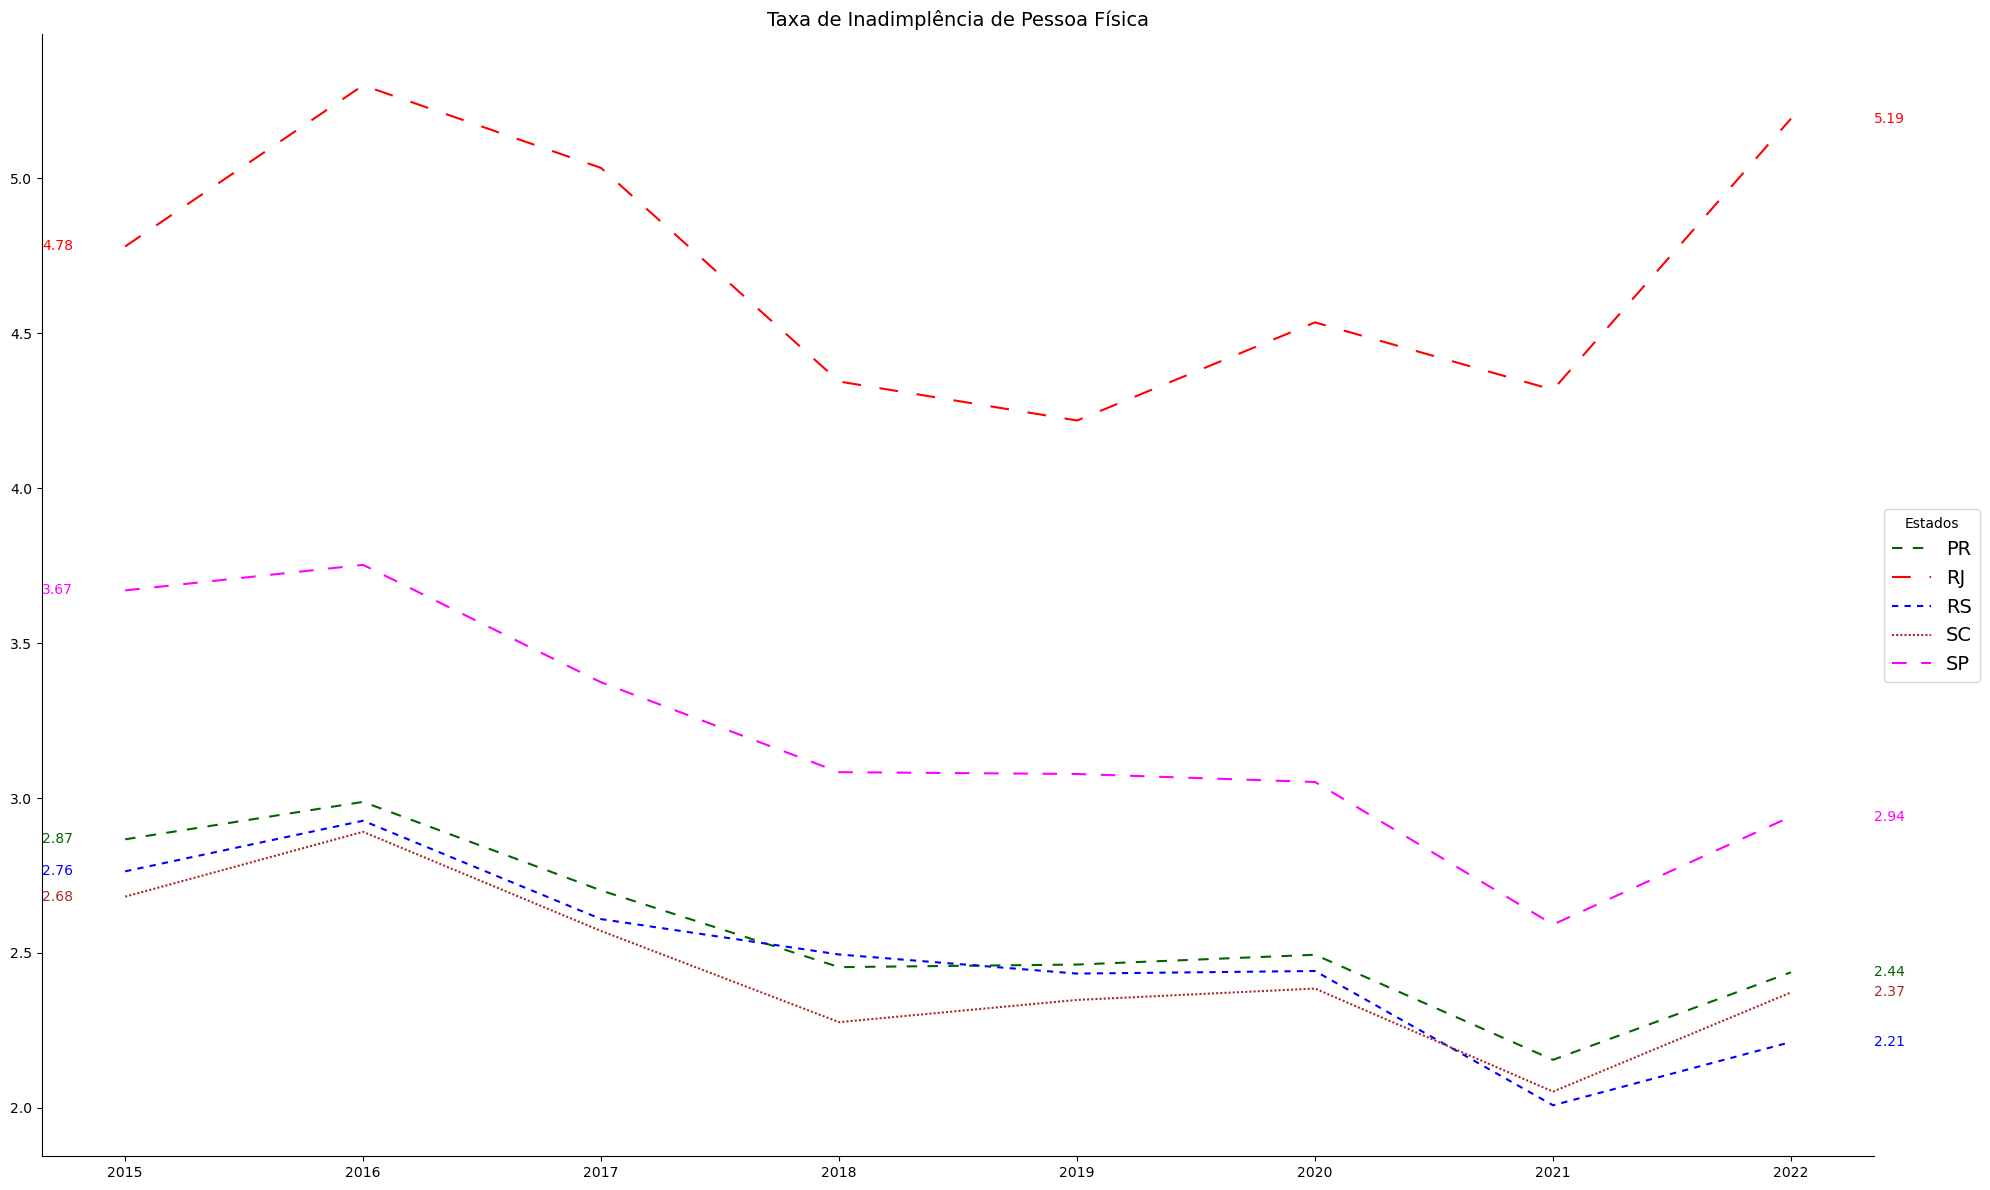

In [139]:
import matplotlib.ticker as plticker
fig, ax = plt.subplots(figsize = (20, 12))
cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}
dashes = {'SC' : (1, 1), 'RS' : (3, 3), 'PR' : (5, 5), 'SP' : (7, 7), 'RJ' : (9, 9)}

sns.lineplot(data = df_credito, x = 'data', y = 'taxa_inadimplencia_pessoas', hue = 'estado', style = 'estado',
            palette = cores, dashes = dashes)

ax.legend(loc = 'center left', title = 'Estados', fontsize = 14, bbox_to_anchor = (1, 0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Taxa de Inadimplência de Pessoa Física', fontsize = 14)

for i in ax.lines:
    y = i.get_ydata()
    if len(y) > 0:
        ax.annotate(f'{y[0]:.2f}', xy = (0,y[0]), xycoords = ('axes fraction', 'data'), 
                     ha = 'left', va = 'center', color = i.get_color())
        ax.annotate(f'{y[-1]:.2f}', xy = (1,y[-1]), xycoords = ('axes fraction', 'data'), 
                     ha = 'left', va = 'center', color = i.get_color())

fig.tight_layout()
plt.savefig('inadim_pessoa')         
plt.show();

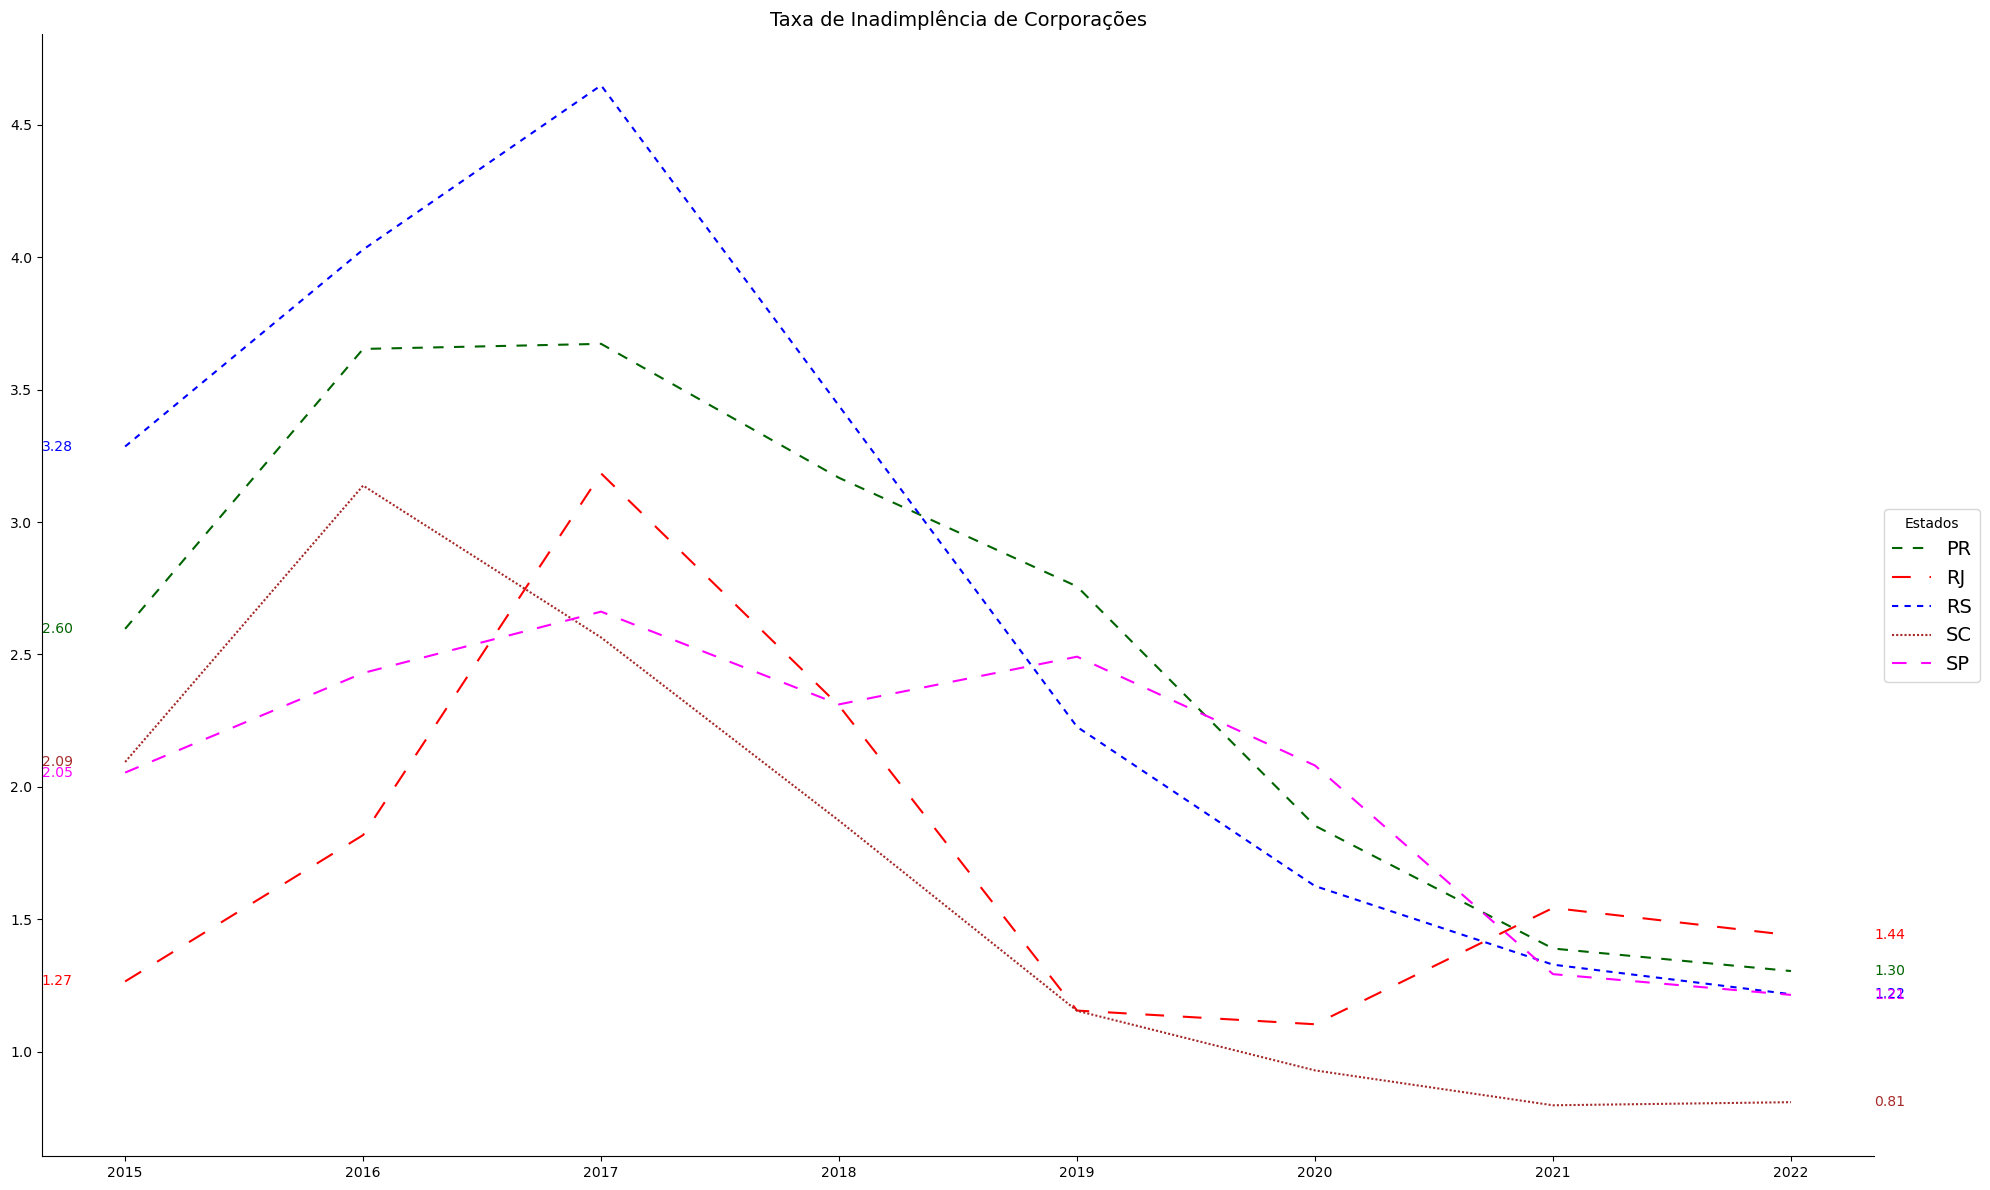

In [140]:
import matplotlib.ticker as plticker
fig, ax = plt.subplots(figsize = (20, 12))
cores = {'SC' : 'brown', 'RS' : 'blue', 'PR' : 'darkgreen', 'SP' : 'magenta', 'RJ' : 'red'}
dashes = {'SC' : (1, 1), 'RS' : (3, 3), 'PR' : (5, 5), 'SP' : (7, 7), 'RJ' : (9, 9)}

sns.lineplot(data = df_credito, x = 'data', y = 'taxa_inadimplencia_corporacoes', hue = 'estado', style = 'estado',
            palette = cores, dashes = dashes)

ax.legend(loc = 'center left', title = 'Estados', fontsize = 14, bbox_to_anchor = (1, 0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Taxa de Inadimplência de Corporações', fontsize = 14)

for i in ax.lines:
    y = i.get_ydata()
    if len(y) > 0:
        ax.annotate(f'{y[0]:.2f}', xy = (0,y[0]), xycoords = ('axes fraction', 'data'), 
                     ha = 'left', va = 'center', color = i.get_color())
        ax.annotate(f'{y[-1]:.2f}', xy = (1,y[-1]), xycoords = ('axes fraction', 'data'), 
                     ha = 'left', va = 'center', color = i.get_color())

fig.tight_layout()
plt.savefig('inadim_corp') 
plt.show();

# Fim